Importing libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as ans
import plotly.graph_objs as go
import plotly.figure_factory as ff
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

Loading Dataset

In [ ]:
df1 = pd.read_excel('/content/EV_data.xlsx')
df1.head()

Brand         Model     Type  Battery Capacity (kWh)  Range (km)  \
0  Bajaj        Chetak  Scooter                    3.80         126   
1    OLA      Roadster  Scooter                    3.90         151   
2    OLA  Roadster Pro  Scooter                    4.50         316   
3    TVS         iQube  Scooter                    3.04         100   
4    OLA          S1 X  Scooter                    2.98         190   

   Power (HP)  Torque (Nm) Price (INR)  Launch Year  Charging Time (hrs)  \
0         4.1         16.2    1,50,000         2020                  5.0   
1        11.0         58.0    1,49,000         2023                  5.0   
2        12.0         63.0    1,60,000         2023                  6.5   
3         5.4         22.0    1,00,000         2020                  5.0   
4         8.5         58.0    1,10,000         2023                  6.5   

   Mileage (km/kWh)  Rating (out of 5)  Review Count  Sales (units)  
0                35                4.0            82          15000  
1                46                4.5            26          12000  
2                45                4.6            56          10000  
3                40                4.2            78           8000  
4                45                4.4            37           9500

In [ ]:
df2 = pd.read_excel('/content/EV_list.xlsx')
df2.head()

Name    Range Rating  Review Count       Price  \
0      Bajaj Chetak   126 km  3.6/5           331  ₹ 1,11,905   
1      OLA Roadster   151 km  4.7/5            48  ₹ 1,04,999   
2  OLA Roadster Pro   316 km  4.9/5            33  ₹ 1,99,999   
3         TVS iQube  100 km   3.4/5           307  ₹ 1,17,630   
4          OLA S1 X   190 km  4.2/5           281    ₹ 84,999   

           Top Speed           Type  
0            63 Kmph     2-Wheelers  
1           116 Kmph     2-Wheelers  
2           194 Kmph     2-Wheelers  
3            75 Kmph     2-Wheelers  
4            85 Kmph     2-Wheelers

In [ ]:
df3 = pd.read_excel('/content/car_sales.xlsx')
df3.head()

Model Name  March  April    May   june   July   August
0     Marazzo     51     20     16     12     14        8
1        Thar   6049   6160   5750   5376   4385     4268
2     XUV 3XO   2072   4003  10000   8500  10000     9000
3  Bolero Neo  10347   9537   8026   7365   6930     6494
4   Scorpio-N  15151  14807  13717  12307  12237    13787

In [ ]:
df4 = pd.read_csv('/content/cars_list.csv')
df4.head()

Unnamed: 0  Make      Model  Variant Ex-Showroom_Price Displacement  \
0           0  Tata  Nano Genx       Xt      Rs. 2,92,667       624 cc   
1           1  Tata  Nano Genx       Xe      Rs. 2,36,447       624 cc   
2           2  Tata  Nano Genx  Emax Xm      Rs. 2,96,661       624 cc   
3           3  Tata  Nano Genx      Xta      Rs. 3,34,768       624 cc   
4           4  Tata  Nano Genx       Xm      Rs. 2,72,223       624 cc   

   Cylinders  Valves_Per_Cylinder              Drivetrain  \
0        2.0                  2.0  RWD (Rear Wheel Drive)   
1        2.0                  2.0  RWD (Rear Wheel Drive)   
2        2.0                  2.0  RWD (Rear Wheel Drive)   
3        2.0                  2.0  RWD (Rear Wheel Drive)   
4        2.0                  2.0  RWD (Rear Wheel Drive)   

  Cylinder_Configuration  ... Leather_Wrapped_Steering Automatic_Headlamps  \
0                In-line  ...                      NaN                 NaN   
1                In-line  ...                      NaN                 NaN   
2                In-line  ...                      NaN                 NaN   
3                In-line  ...                      NaN                 NaN   
4                In-line  ...                      NaN                 NaN   

  Engine_Type ASR_/_Traction_Control Cruise_Control USB_Ports  \
0         NaN                    NaN            NaN       NaN   
1         NaN                    NaN            NaN       NaN   
2         NaN                    NaN            NaN       NaN   
3         NaN                    NaN            NaN       NaN   
4         NaN                    NaN            NaN       NaN   

  Heads-Up_Display Welcome_Lights Battery  Electric_Range  
0              NaN            NaN     NaN             NaN  
1              NaN            NaN     NaN             NaN  
2              NaN            NaN     NaN             NaN  
3              NaN            NaN     NaN             NaN  
4              NaN            NaN     NaN             NaN  

[5 rows x 141 columns]

In [ ]:
df5 = pd.read_excel('/content/state_data.xlsx')
df5.head()

State      Capital  Number of Cities  Literacy Rate (%)  \
0     Maharashtra       Mumbai                36               89.7   
1      Tamil Nadu      Chennai                38               90.2   
2         Gujarat  Gandhinagar                33               87.6   
3  Andhra Pradesh    Amaravati                13               67.3   
4       Karnataka    Bengaluru                30               88.7   

              Major Cities    Key Automotive Companies  \
0             Pune, Nashik  Tata Motors, Mercedes-Benz   
1      Chennai, Coimbatore      Hyundai, Ford, Renault   
2      Ahmedabad, Vadodara                Suzuki, Ford   
3  Visakhapatnam, Tirupati   Kia Motors, Ashok Leyland   
4        Bengaluru, Mysuru               Toyota, Honda   

              Vehicle Models Produced    Infrastructure Availability  \
0              Tata Nexon, Tata Tiago              Good roads, ports   
1         Hyundai Creta, Renault Kwid   Established industrial parks   
2  Maruti Suzuki Swift, Ford EcoSport       Robust logistics network   
3    Kia Seltos, Ashok Leyland trucks  Good transport infrastructure   
4           Toyota Innova, Honda City  Well-developed infrastructure   

                      Government Support  
0        EV policy incentives, subsidies  
1  Tax exemptions, investment incentives  
2     Single window clearance, subsidies  
3    Manufacturing incentives, subsidies  
4   Policy support for EVs, tax benefits

In [ ]:
df1.shape

(27, 14)

In [ ]:
df2.shape

(50, 7)

In [ ]:
df3.shape

(72, 7)

In [ ]:
df4.shape

(1276, 141)

In [ ]:
df5.shape

(13, 9)

In [ ]:
df1.dtypes

Brand                      object
Model                      object
Type                       object
Battery Capacity (kWh)    float64
Range (km)                  int64
Power (HP)                float64
Torque (Nm)               float64
Price (INR)                object
Launch Year                 int64
Charging Time (hrs)       float64
Mileage (km/kWh)            int64
Rating (out of 5)         float64
Review Count                int64
Sales (units)               int64
dtype: object

In [ ]:
df2.dtypes

Name                  object
Range                 object
Rating                object
Review Count           int64
Price                 object
         Top Speed    object
          Type        object
dtype: object

In [ ]:
df3.dtypes

Model Name    object
March         object
April         object
May           object
june          object
July          object
 August        int64
dtype: object

In [ ]:
df4.dtypes

Unnamed: 0             int64
Make                  object
Model                 object
Variant               object
Ex-Showroom_Price     object
                      ...   
USB_Ports            float64
Heads-Up_Display      object
Welcome_Lights        object
Battery               object
Electric_Range        object
Length: 141, dtype: object

In [ ]:
df5.dtypes

State                           object
Capital                         object
Number of Cities                 int64
Literacy Rate (%)              float64
Major Cities                    object
Key Automotive Companies        object
Vehicle Models Produced         object
Infrastructure Availability     object
Government Support              object
dtype: object

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Brand                   27 non-null     object 
 1   Model                   27 non-null     object 
 2   Type                    27 non-null     object 
 3   Battery Capacity (kWh)  27 non-null     float64
 4   Range (km)              27 non-null     int64  
 5   Power (HP)              27 non-null     float64
 6   Torque (Nm)             27 non-null     float64
 7   Price (INR)             27 non-null     object 
 8   Launch Year             27 non-null     int64  
 9   Charging Time (hrs)     27 non-null     float64
 10  Mileage (km/kWh)        27 non-null     int64  
 11  Rating (out of 5)       27 non-null     float64
 12  Review Count            27 non-null     int64  
 13  Sales (units)           27 non-null     int64  
dtypes: float64(5), int64(5), object(4)
memory us

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Name                50 non-null     object
 1   Range               50 non-null     object
 2   Rating              50 non-null     object
 3   Review Count        50 non-null     int64 
 4   Price               50 non-null     object
 5            Top Speed  50 non-null     object
 6             Type      50 non-null     object
dtypes: int64(1), object(6)
memory usage: 2.9+ KB


In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Model Name  72 non-null     object
 1   March       72 non-null     object
 2   April       72 non-null     object
 3   May         72 non-null     object
 4   june        72 non-null     object
 5   July        72 non-null     object
 6    August     72 non-null     int64 
dtypes: int64(1), object(6)
memory usage: 4.1+ KB


In [ ]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1276 entries, 0 to 1275
Columns: 141 entries, Unnamed: 0 to Electric_Range
dtypes: float64(6), int64(1), object(134)
memory usage: 1.4+ MB


In [ ]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   State                        13 non-null     object 
 1   Capital                      13 non-null     object 
 2   Number of Cities             13 non-null     int64  
 3   Literacy Rate (%)            13 non-null     float64
 4   Major Cities                 13 non-null     object 
 5   Key Automotive Companies     13 non-null     object 
 6   Vehicle Models Produced      13 non-null     object 
 7   Infrastructure Availability  13 non-null     object 
 8   Government Support           13 non-null     object 
dtypes: float64(1), int64(1), object(7)
memory usage: 1.0+ KB


In [ ]:
df1.describe()

Battery Capacity (kWh)  Range (km)  Power (HP)  Torque (Nm)  \
count               27.000000   27.000000   27.000000    27.000000   
mean                 6.564074  140.740741   11.677778    47.674074   
std                 11.588538   52.914730   10.118465    39.269959   
min                  1.200000   60.000000    0.900000    10.000000   
25%                  3.000000  110.000000    5.450000    20.000000   
50%                  3.700000  140.000000    9.000000    30.000000   
75%                  4.000000  154.000000   12.000000    61.500000   
max                 60.000000  316.000000   42.000000   170.000000   

       Launch Year  Charging Time (hrs)  Mileage (km/kWh)  Rating (out of 5)  \
count    27.000000            27.000000         27.000000          27.000000   
mean   2021.814815             5.129630         38.370370           4.262963   
std       1.359780             1.260285         10.149453           0.283044   
min    2019.000000             2.000000         10.000000           3.500000   
25%    2021.000000             4.000000         32.500000           4.050000   
50%    2022.000000             5.000000         40.000000           4.300000   
75%    2023.000000             6.000000         45.500000           4.500000   
max    2023.000000             8.000000         60.000000           4.700000   

       Review Count  Sales (units)  
count     27.000000      27.000000  
mean      57.592593    6351.851852  
std       32.478702    3292.809225  
min        5.000000    2500.000000  
25%       31.500000    3750.000000  
50%       56.000000    5000.000000  
75%       80.000000    8250.000000  
max      123.000000   15000.000000

In [ ]:
df2.describe()

Review Count
count     50.000000
mean      83.320000
std      104.229034
min        2.000000
25%       20.000000
50%       43.000000
75%       73.000000
max      422.000000

In [ ]:
df3.describe()

August
count     72.000000
mean    4821.638889
std     5204.396325
min        3.000000
25%      830.750000
50%     2524.500000
75%     8659.500000
max    19190.000000

In [ ]:
df4.describe()

Unnamed: 0    Cylinders  Valves_Per_Cylinder        Doors  \
count  1276.000000  1210.000000          1174.000000  1272.000000   
mean    637.500000     4.380992             3.977853     4.550314   
std     368.493781     1.660957             0.833763     0.747816   
min       0.000000     2.000000             1.000000     2.000000   
25%     318.750000     4.000000             4.000000     4.000000   
50%     637.500000     4.000000             4.000000     5.000000   
75%     956.250000     4.000000             4.000000     5.000000   
max    1275.000000    16.000000            16.000000     5.000000   

       Seating_Capacity  Number_of_Airbags  USB_Ports  
count       1270.000000        1141.000000  29.000000  
mean           5.270079           3.787029   1.793103  
std            1.145231           2.522399   0.773642  
min            2.000000           1.000000   1.000000  
25%            5.000000           2.000000   1.000000  
50%            5.000000           2.000000   2.000000  
75%            5.000000           6.000000   2.000000  
max           16.000000          14.000000   3.000000

In [ ]:
df5.describe()

Number of Cities  Literacy Rate (%)
count         13.000000          13.000000
mean          33.846154          78.415385
std           15.571588           9.110511
min           13.000000          66.100000
25%           23.000000          69.300000
50%           33.000000          77.100000
75%           36.000000          87.600000
max           75.000000          90.200000

#Checking for the count of below variables

In [ ]:
df1['Rating (out of 5)'].value_counts()

Rating (out of 5)
4.0    5
4.5    5
4.2    4
4.6    3
4.4    3
4.3    2
4.1    2
4.7    1
3.5    1
3.8    1
Name: count, dtype: int64

In [ ]:
df4['Doors'].value_counts()

Doors
5.0    836
4.0    362
2.0     62
3.0     12
Name: count, dtype: int64

In [ ]:
df1['Type'].value_counts()

Type
Scooter       21
Motorcycle     6
Name: count, dtype: int64

#find the duplicated values

In [ ]:
df1.duplicated().sum()
df2.duplicated().sum()
df3.duplicated().sum()
df4.duplicated().sum()
df5.duplicated().sum()


0

#Analysis of 2-wheeler EVs

<ipython-input-136-2e4b04998ca1>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  f = sns.countplot(x=df1['Type'],palette = 'hsv')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


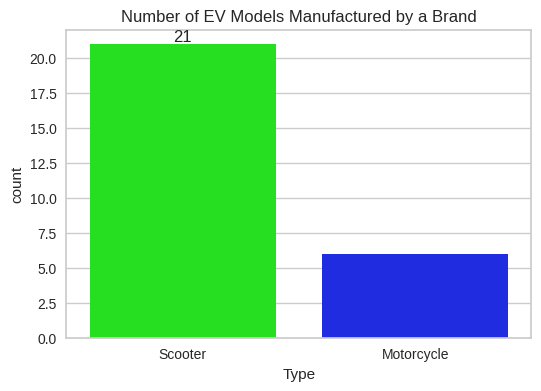

In [ ]:
plt.rcParams['figure.figsize'] = (6, 4)
f = sns.countplot(x=df1['Type'],palette = 'hsv')
f.bar_label(f.containers[0])
plt.title('Number of EV Models Manufactured by a Brand')
plt.show()

<ipython-input-137-d00e7b2b800f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df1, y=df1['Brand'].sort_values(ascending=True), x='Rating (out of 5)', palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:94

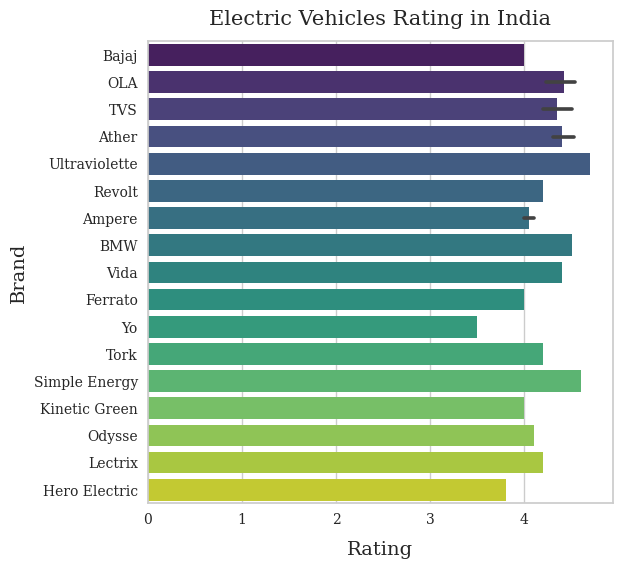

In [ ]:
plt.figure(figsize=(6, 6))
sns.barplot(data=df1, y=df1['Brand'].sort_values(ascending=True), x='Rating (out of 5)', palette='viridis')
plt.ylabel('Brand', fontsize=14, family='serif')
plt.xlabel('Rating', family='serif', fontsize=14, labelpad=10)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title(label='Electric Vehicles Rating in India', weight=200, family='serif', size=15, pad=12)
plt.show()


<ipython-input-138-308adfb6e6ae>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df1, y=df1['Model'].sort_values(ascending=True), x='Sales (units)', palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: F

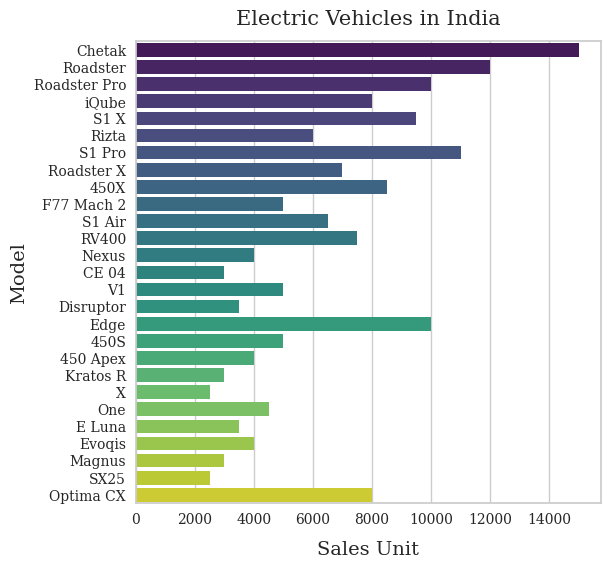

In [ ]:
plt.figure(figsize=(6, 6))
sns.barplot(data=df1, y=df1['Model'].sort_values(ascending=True), x='Sales (units)', palette='viridis')
plt.ylabel('Model', fontsize=14, family='serif')
plt.xlabel('Sales Unit', family='serif', fontsize=14, labelpad=10)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title(label='Electric Vehicles in India', weight=200, family='serif', size=15, pad=12)
plt.show()

<ipython-input-139-d08b07a5718c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df1, y=df1['Model'].sort_values(ascending=True), x='Range (km)', palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: Futu

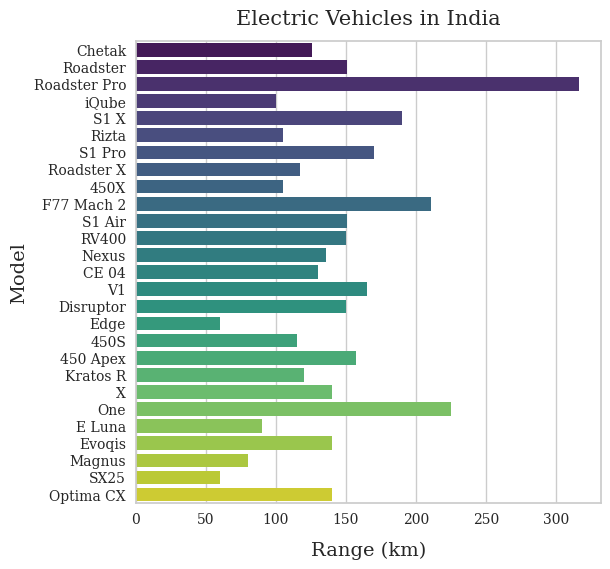

In [ ]:
plt.figure(figsize=(6, 6))
sns.barplot(data=df1, y=df1['Model'].sort_values(ascending=True), x='Range (km)', palette='viridis')
plt.ylabel('Model', fontsize=14, family='serif')
plt.xlabel('Range (km)', family='serif', fontsize=14, labelpad=10)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title(label='Electric Vehicles in India', weight=200, family='serif', size=15, pad=12)
plt.show()

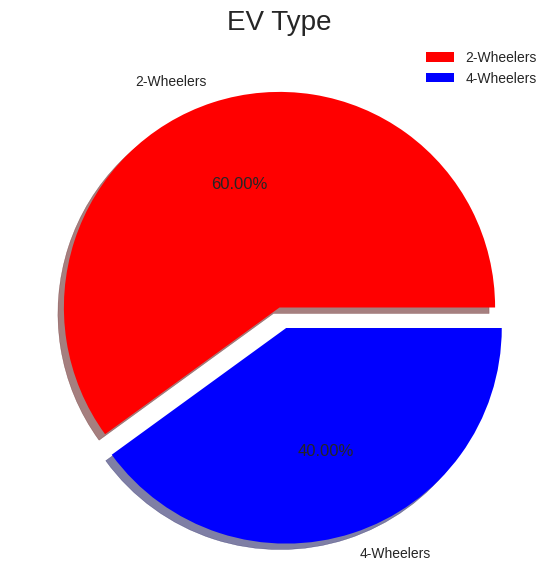

In [ ]:
labels = ['2-Wheelers', '4-Wheelers']
size = df2['          Type'].value_counts()
colors = ['red', 'blue']
explode = [0, 0.1]
plt.rcParams['figure.figsize'] = (7, 7)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('EV Type', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

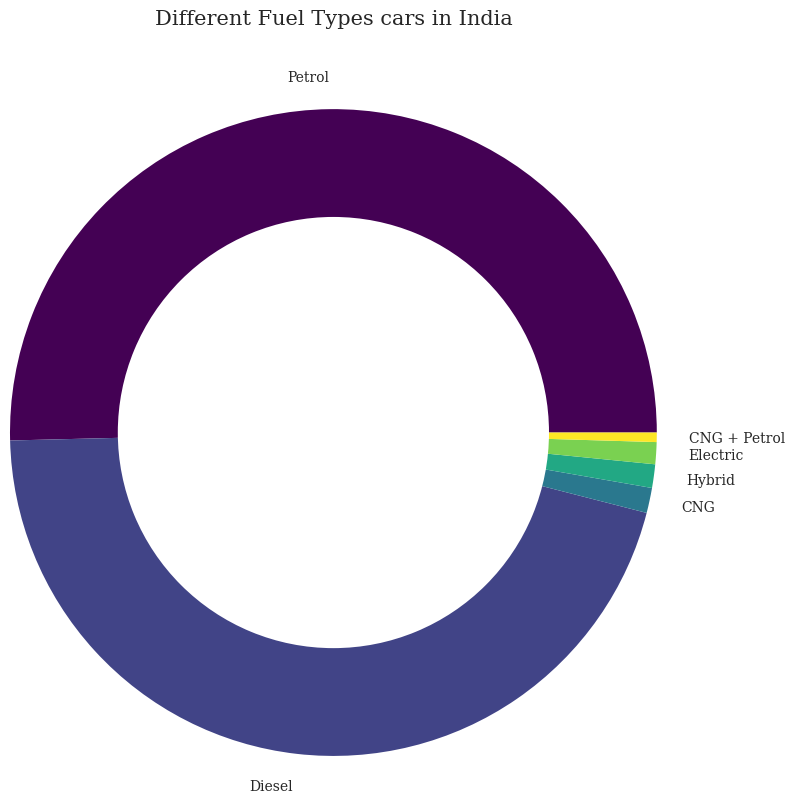

In [ ]:
x = df4['Fuel_Type'].value_counts().plot.pie(radius=1.5, cmap='viridis', startangle=0, textprops=dict(family='serif'))
plt.pie(x=[1], radius=1, colors='white')
plt.title(label='Different Fuel Types cars in India', family='serif', size=15, pad=100)
plt.ylabel('')
plt.show()

<ipython-input-142-6d02a0eb1a11>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df4, y=df4['Body_Type'].sort_values(ascending=True), x='Doors', palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: Futur

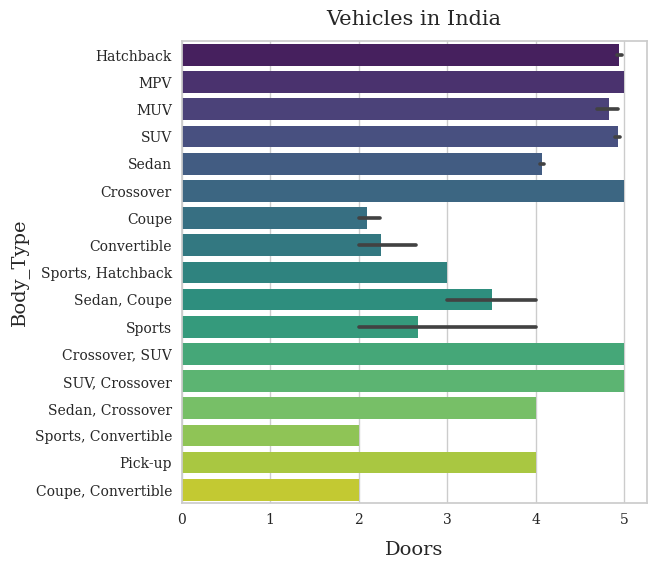

In [ ]:
plt.figure(figsize=(6, 6))
sns.barplot(data=df4, y=df4['Body_Type'].sort_values(ascending=True), x='Doors', palette='viridis')
plt.ylabel('Body_Type', fontsize=14, family='serif')
plt.xlabel('Doors', family='serif', fontsize=14, labelpad=10)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title(label='Vehicles in India', weight=200, family='serif', size=15, pad=12)
plt.show()

<ipython-input-143-12f3dfc8f7f3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df5, y=df5['Key Automotive Companies'].sort_values(ascending=True), x='State', palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_bas

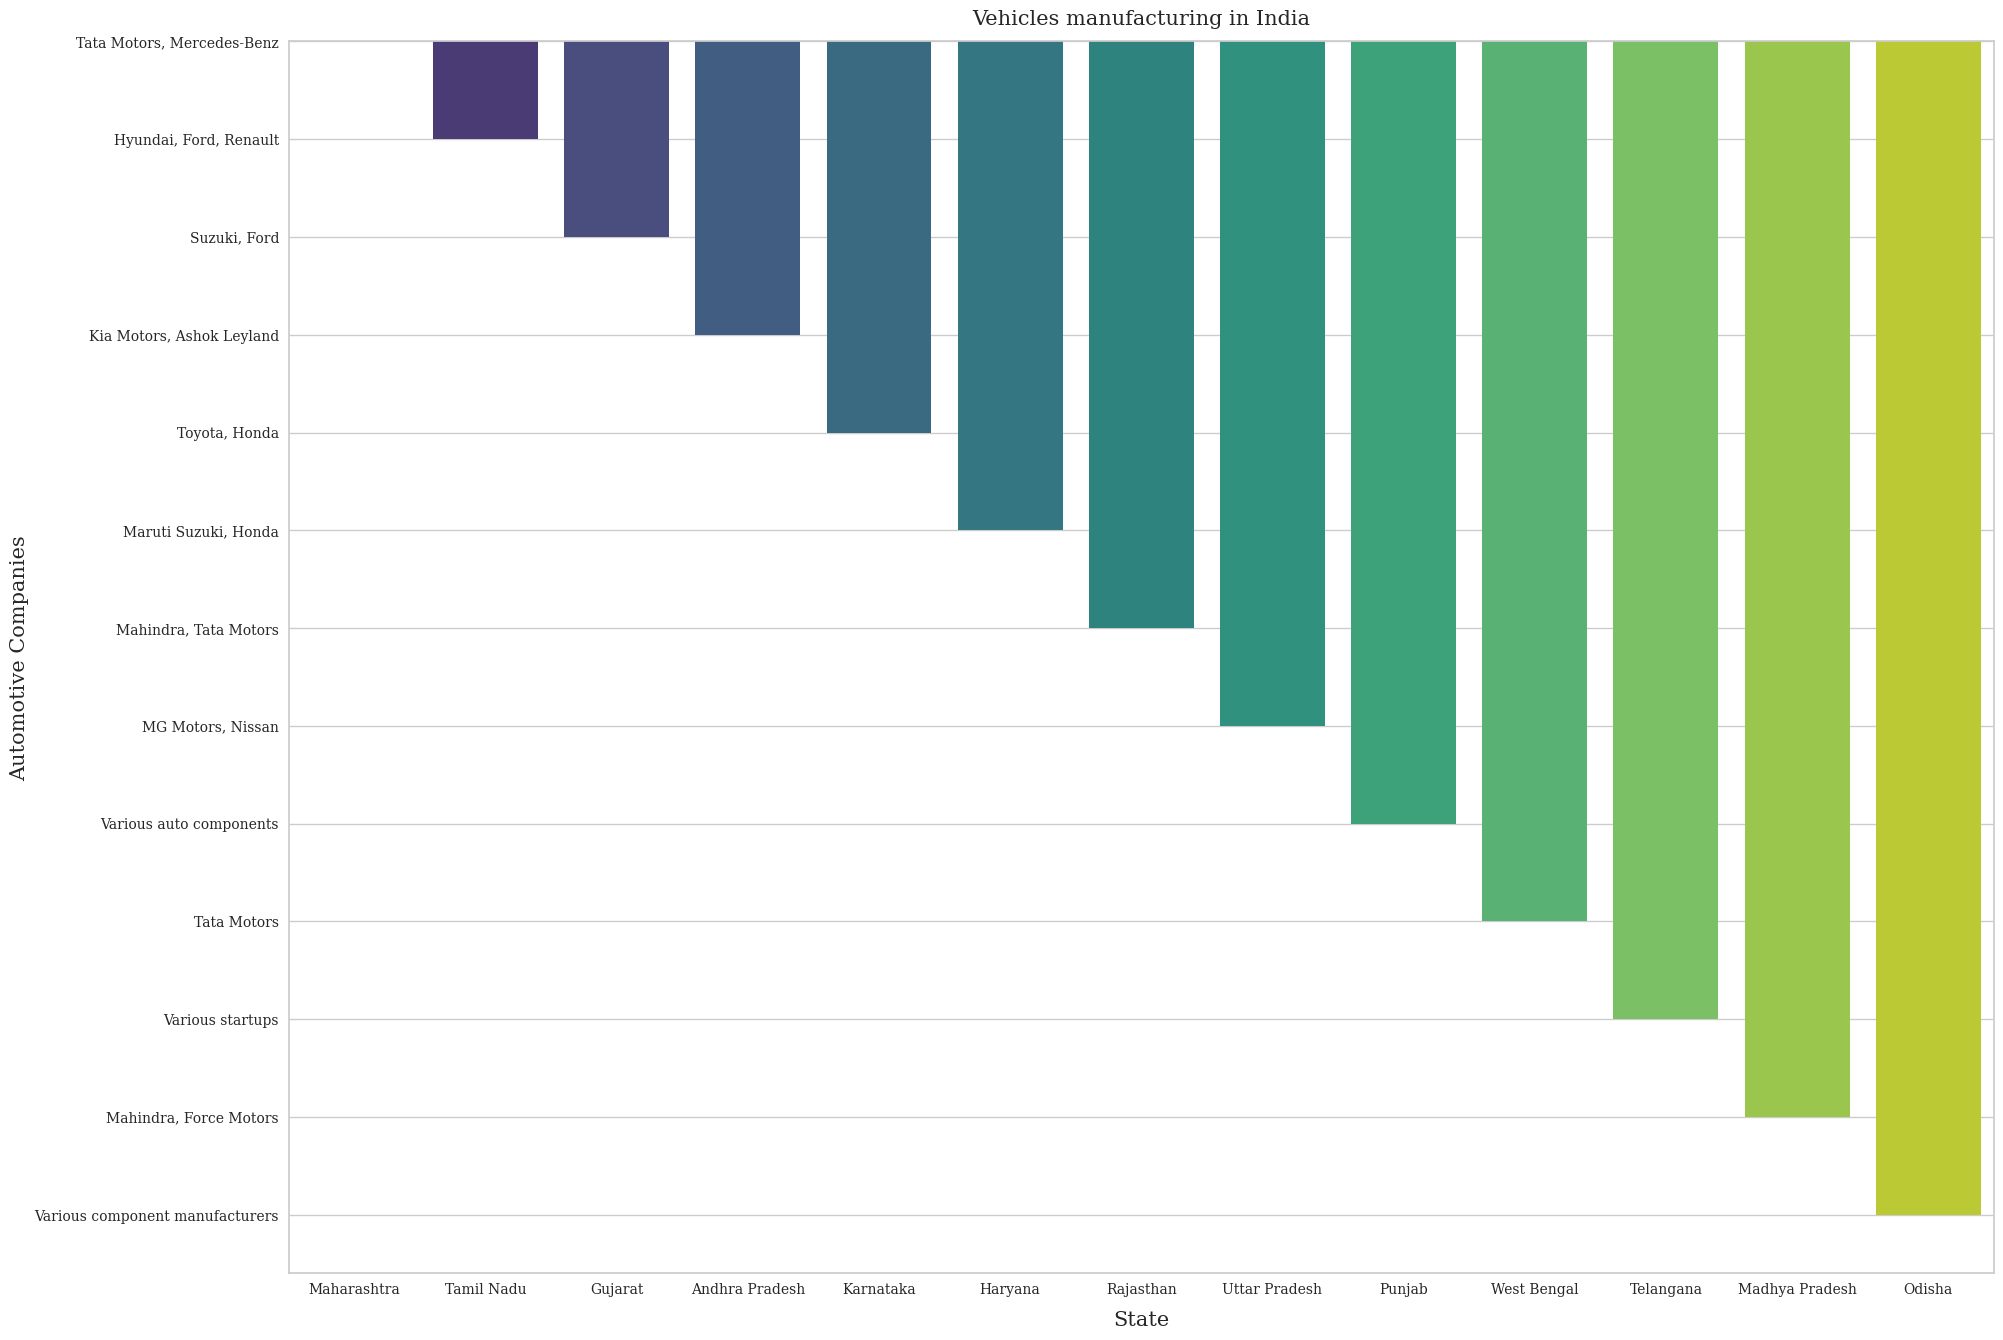

In [ ]:
plt.figure(figsize=(22, 16))
sns.barplot(data=df5, y=df5['Key Automotive Companies'].sort_values(ascending=True), x='State', palette='viridis')
plt.ylabel('Automotive Companies', fontsize=15, family='serif')
plt.xlabel('State', family='serif', fontsize=15, labelpad=10)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title(label='Vehicles manufacturing in India', weight=200, family='serif', size=15, pad=12)
plt.show()

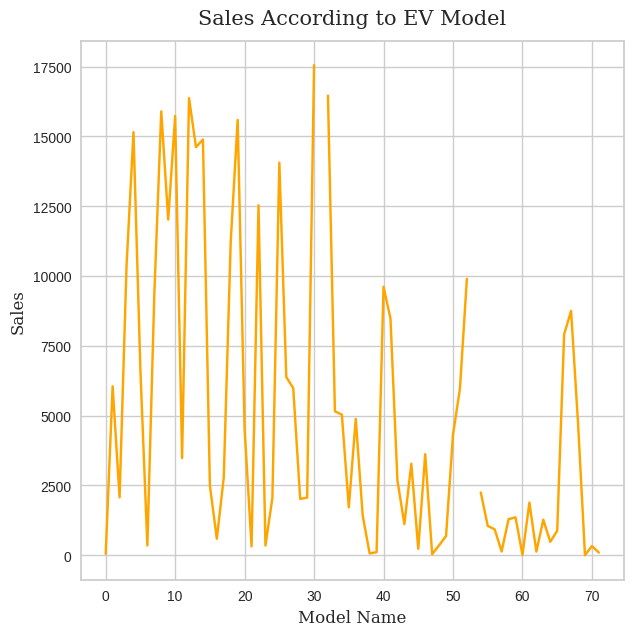

In [ ]:
# plotting the Sales from dataset 3
plt.plot(pd.to_numeric(df3['March'], errors='coerce'), color='orange')
plt.xlabel('Model Name', family='serif', size=12)
plt.ylabel('Sales', family='serif', size=12)
plt.title('Sales According to EV Model', family='serif', size=15, pad=12);

# Monthly Sales Trends: Last 6 Months

<ipython-input-145-fb8463278efb>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  sns.catplot(kind='bar', data=df3.replace('-', 0), x='Model Name', y='March', palette='viridis', ci=None, height=20, aspect=2) # Replace hyphens with 0
<ipython-input-145-fb8463278efb>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(kind='bar', data=df3.replace('-', 0), x='Model Name', y='March', palette='viridis', ci=None, height=20, aspect=2) # Replace hyphens with 0
<ipython-input-145-fb8463278efb>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.catplot(kind='bar', data=df3

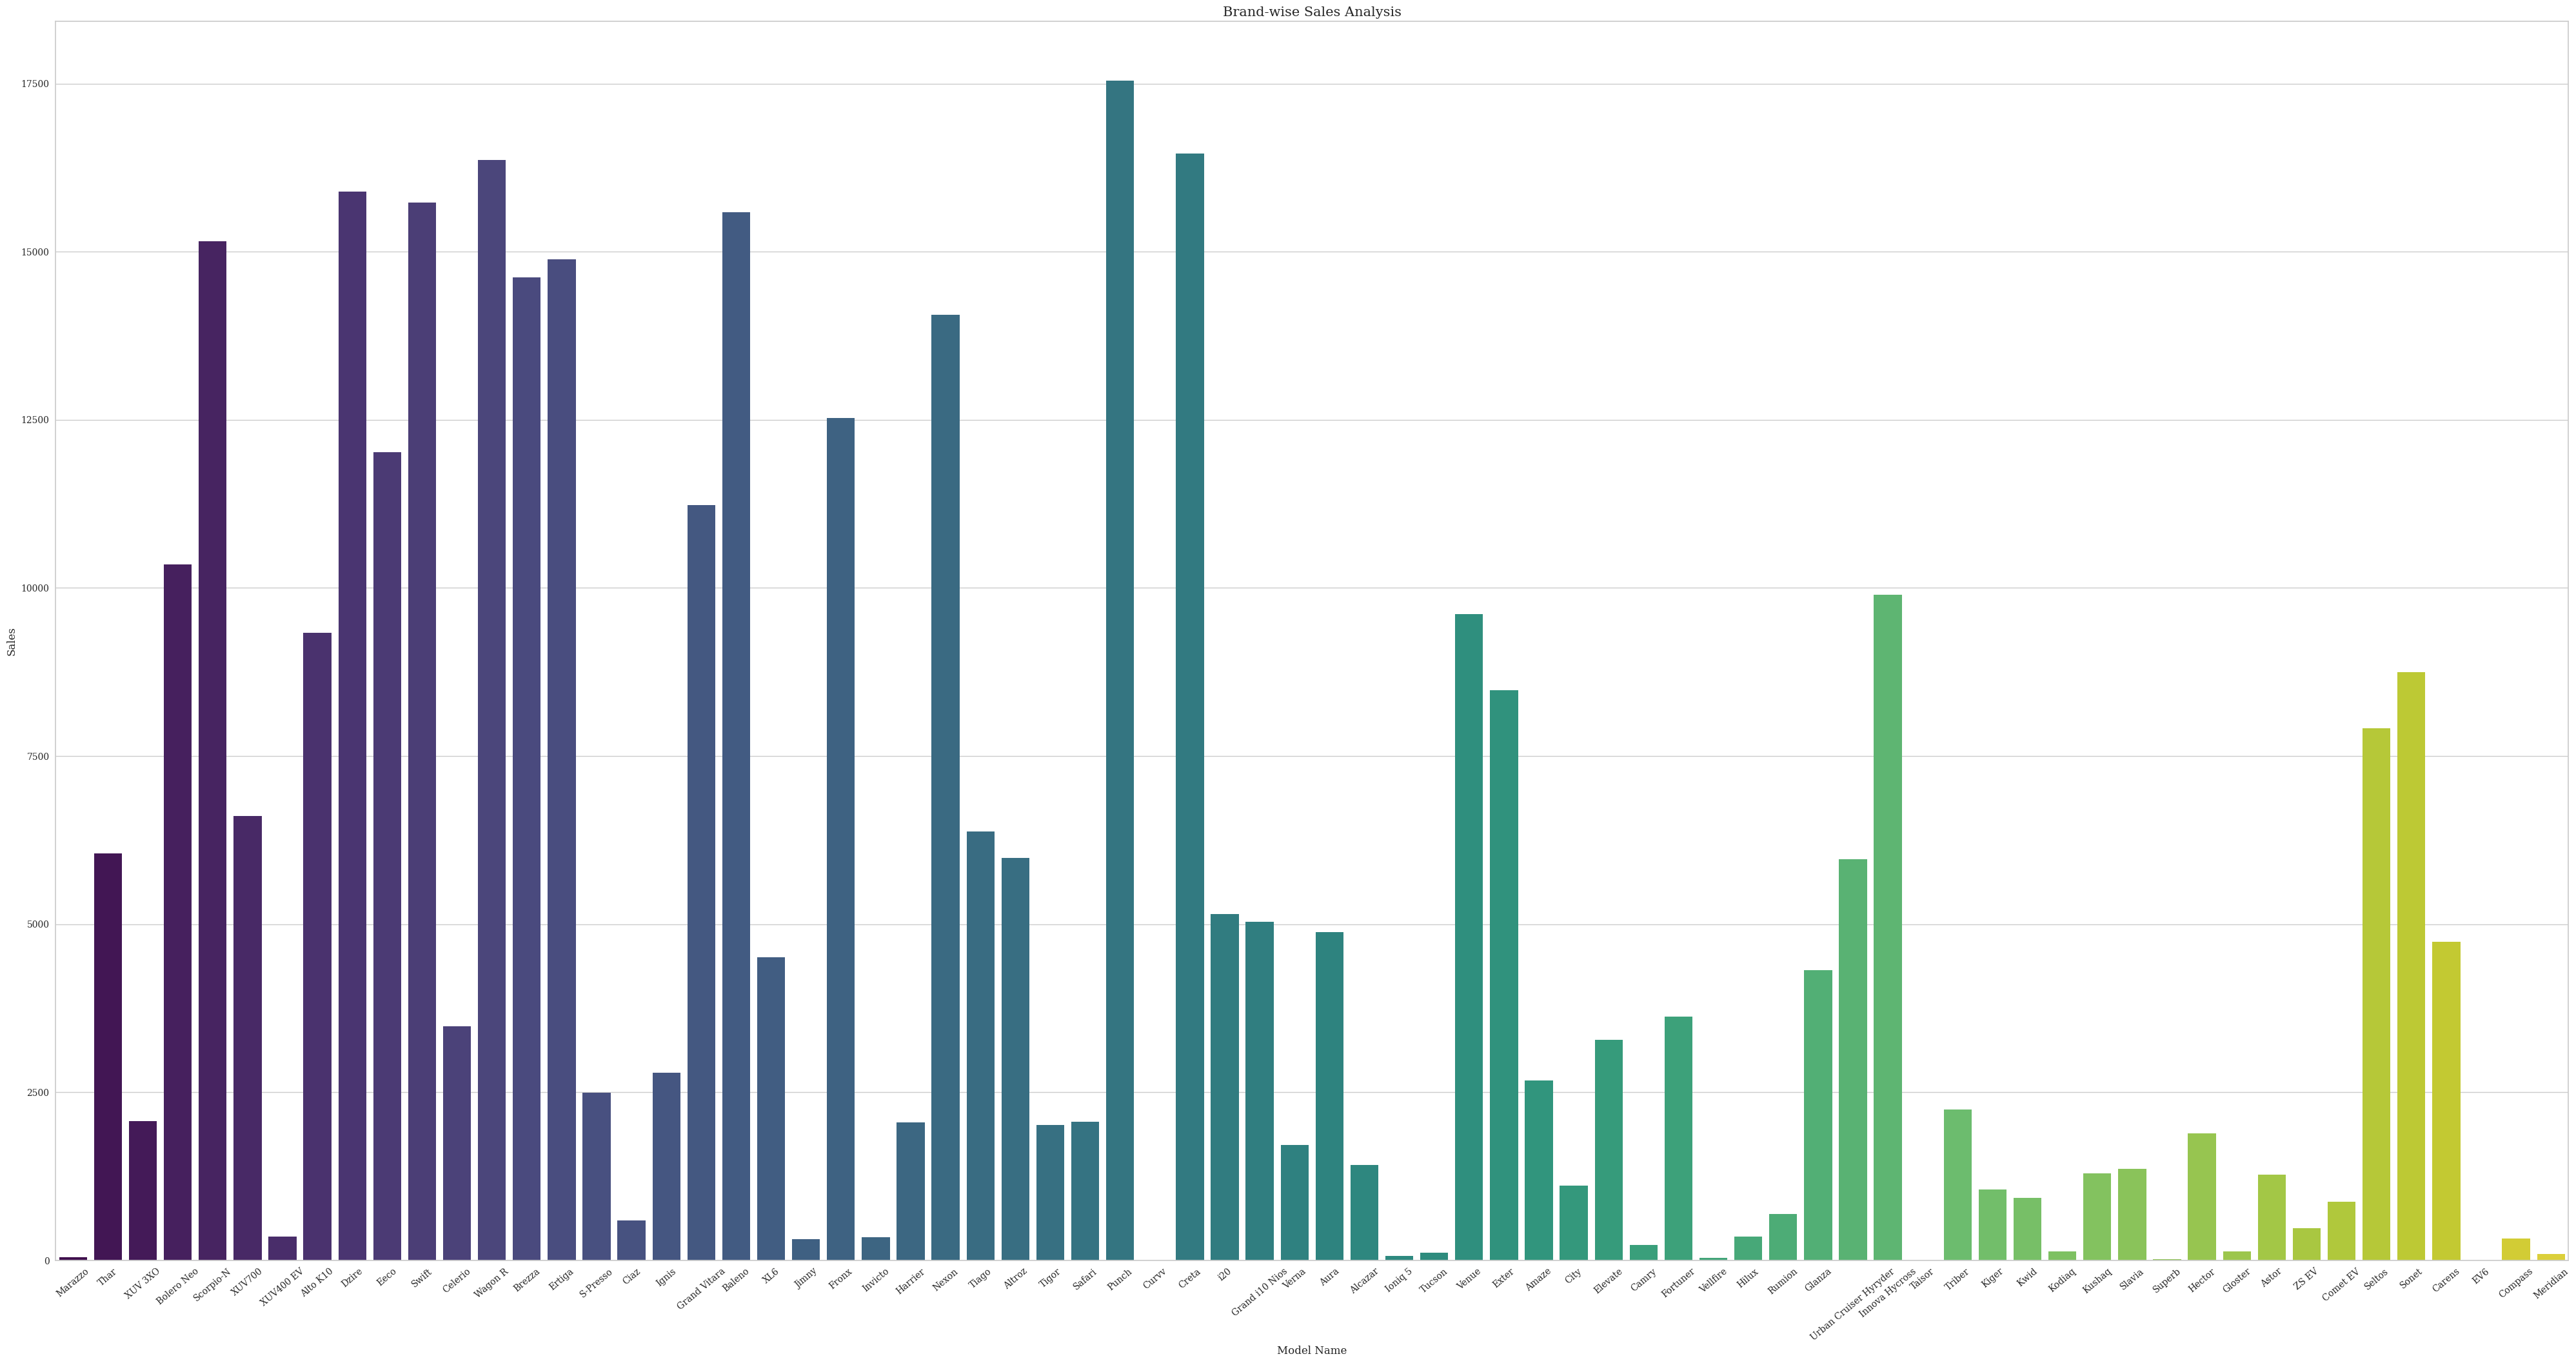

In [ ]:
sns.catplot(kind='bar', data=df3.replace('-', 0), x='Model Name', y='March', palette='viridis', ci=None, height=20, aspect=2) # Replace hyphens with 0
sns.despine(right=False, top=False)
plt.tick_params(axis='x', rotation=40)
plt.xlabel('Model Name',family='serif', size=12)
plt.ylabel('Sales', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title('Brand-wise Sales Analysis', family='serif', size=15);

<ipython-input-146-14cb96984453>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  sns.catplot(kind='bar', data=df3.replace('-', 0), x='Model Name', y='April', palette='viridis', ci=None, height=20, aspect=2) # Replace hyphens with 0
<ipython-input-146-14cb96984453>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(kind='bar', data=df3.replace('-', 0), x='Model Name', y='April', palette='viridis', ci=None, height=20, aspect=2) # Replace hyphens with 0
<ipython-input-146-14cb96984453>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.catplot(kind='bar', data=df3

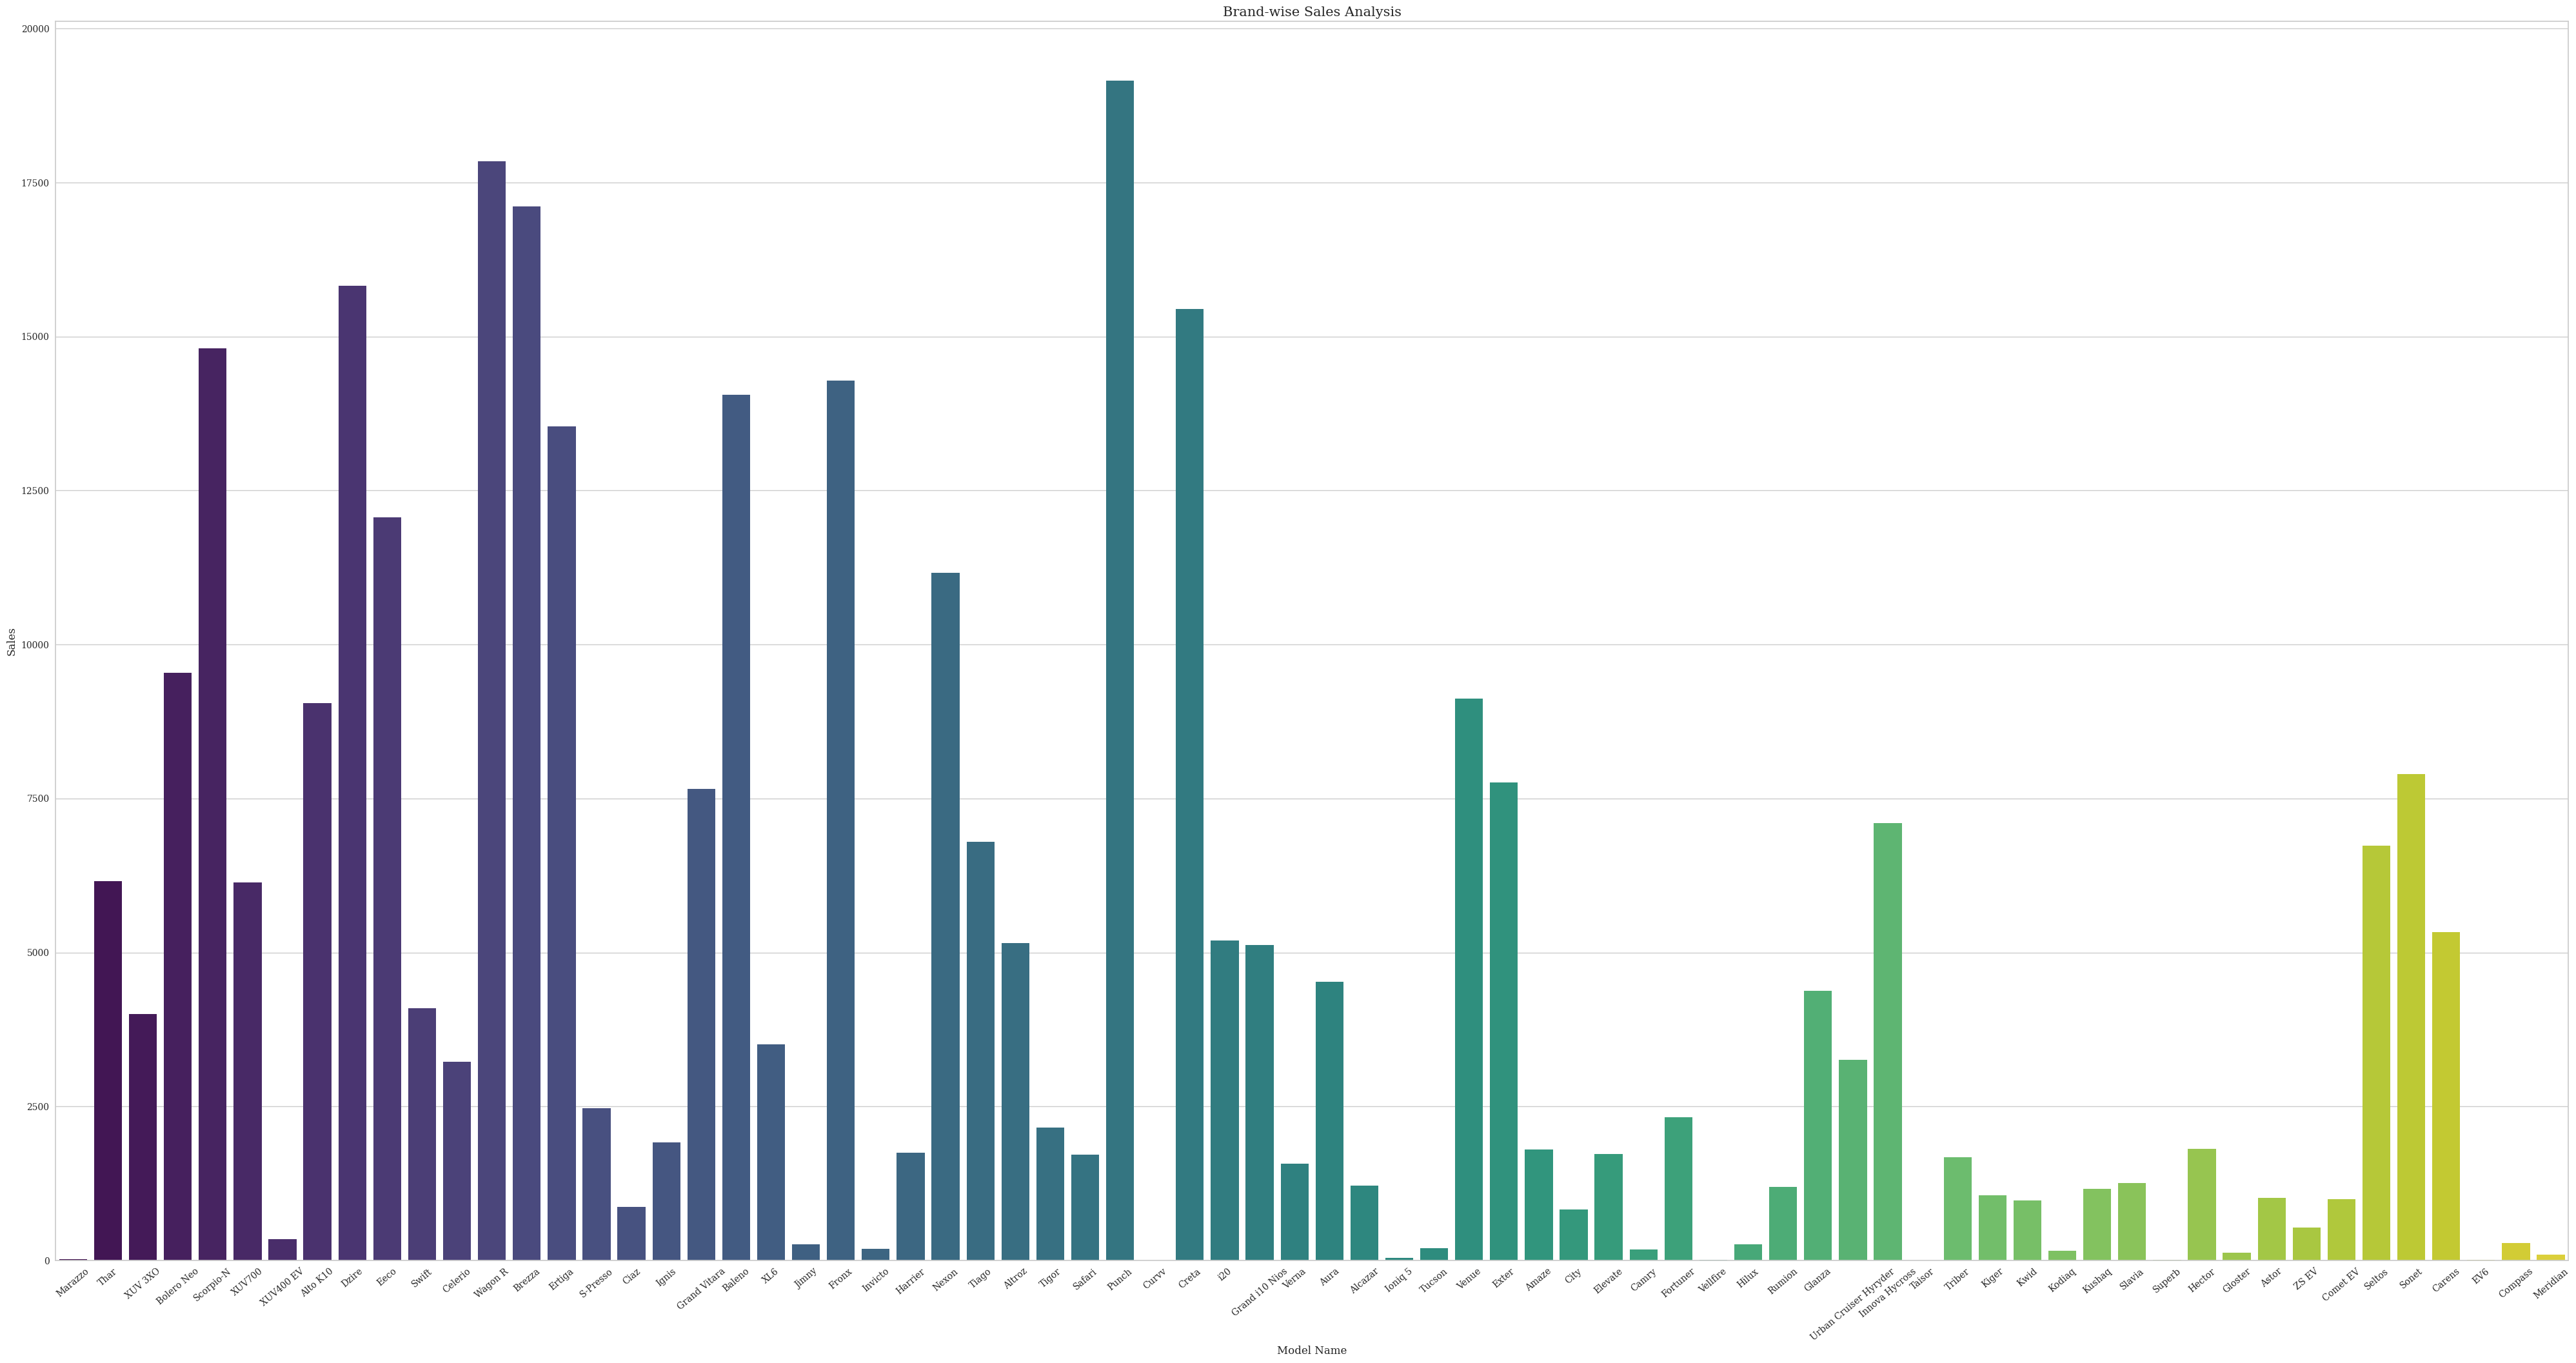

In [ ]:
sns.catplot(kind='bar', data=df3.replace('-', 0), x='Model Name', y='April', palette='viridis', ci=None, height=20, aspect=2) # Replace hyphens with 0
sns.despine(right=False, top=False)
plt.tick_params(axis='x', rotation=40)
plt.xlabel('Model Name',family='serif', size=12)
plt.ylabel('Sales', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title('Brand-wise Sales Analysis', family='serif', size=15);

<ipython-input-147-8ef947c1f4ec>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  sns.catplot(kind='bar', data=df3.replace('-', 0), x='Model Name', y='May', palette='viridis', ci=None, height=20, aspect=2) # Replace hyphens with 0
<ipython-input-147-8ef947c1f4ec>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(kind='bar', data=df3.replace('-', 0), x='Model Name', y='May', palette='viridis', ci=None, height=20, aspect=2) # Replace hyphens with 0
<ipython-input-147-8ef947c1f4ec>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.catplot(kind='bar', data=df3.rep

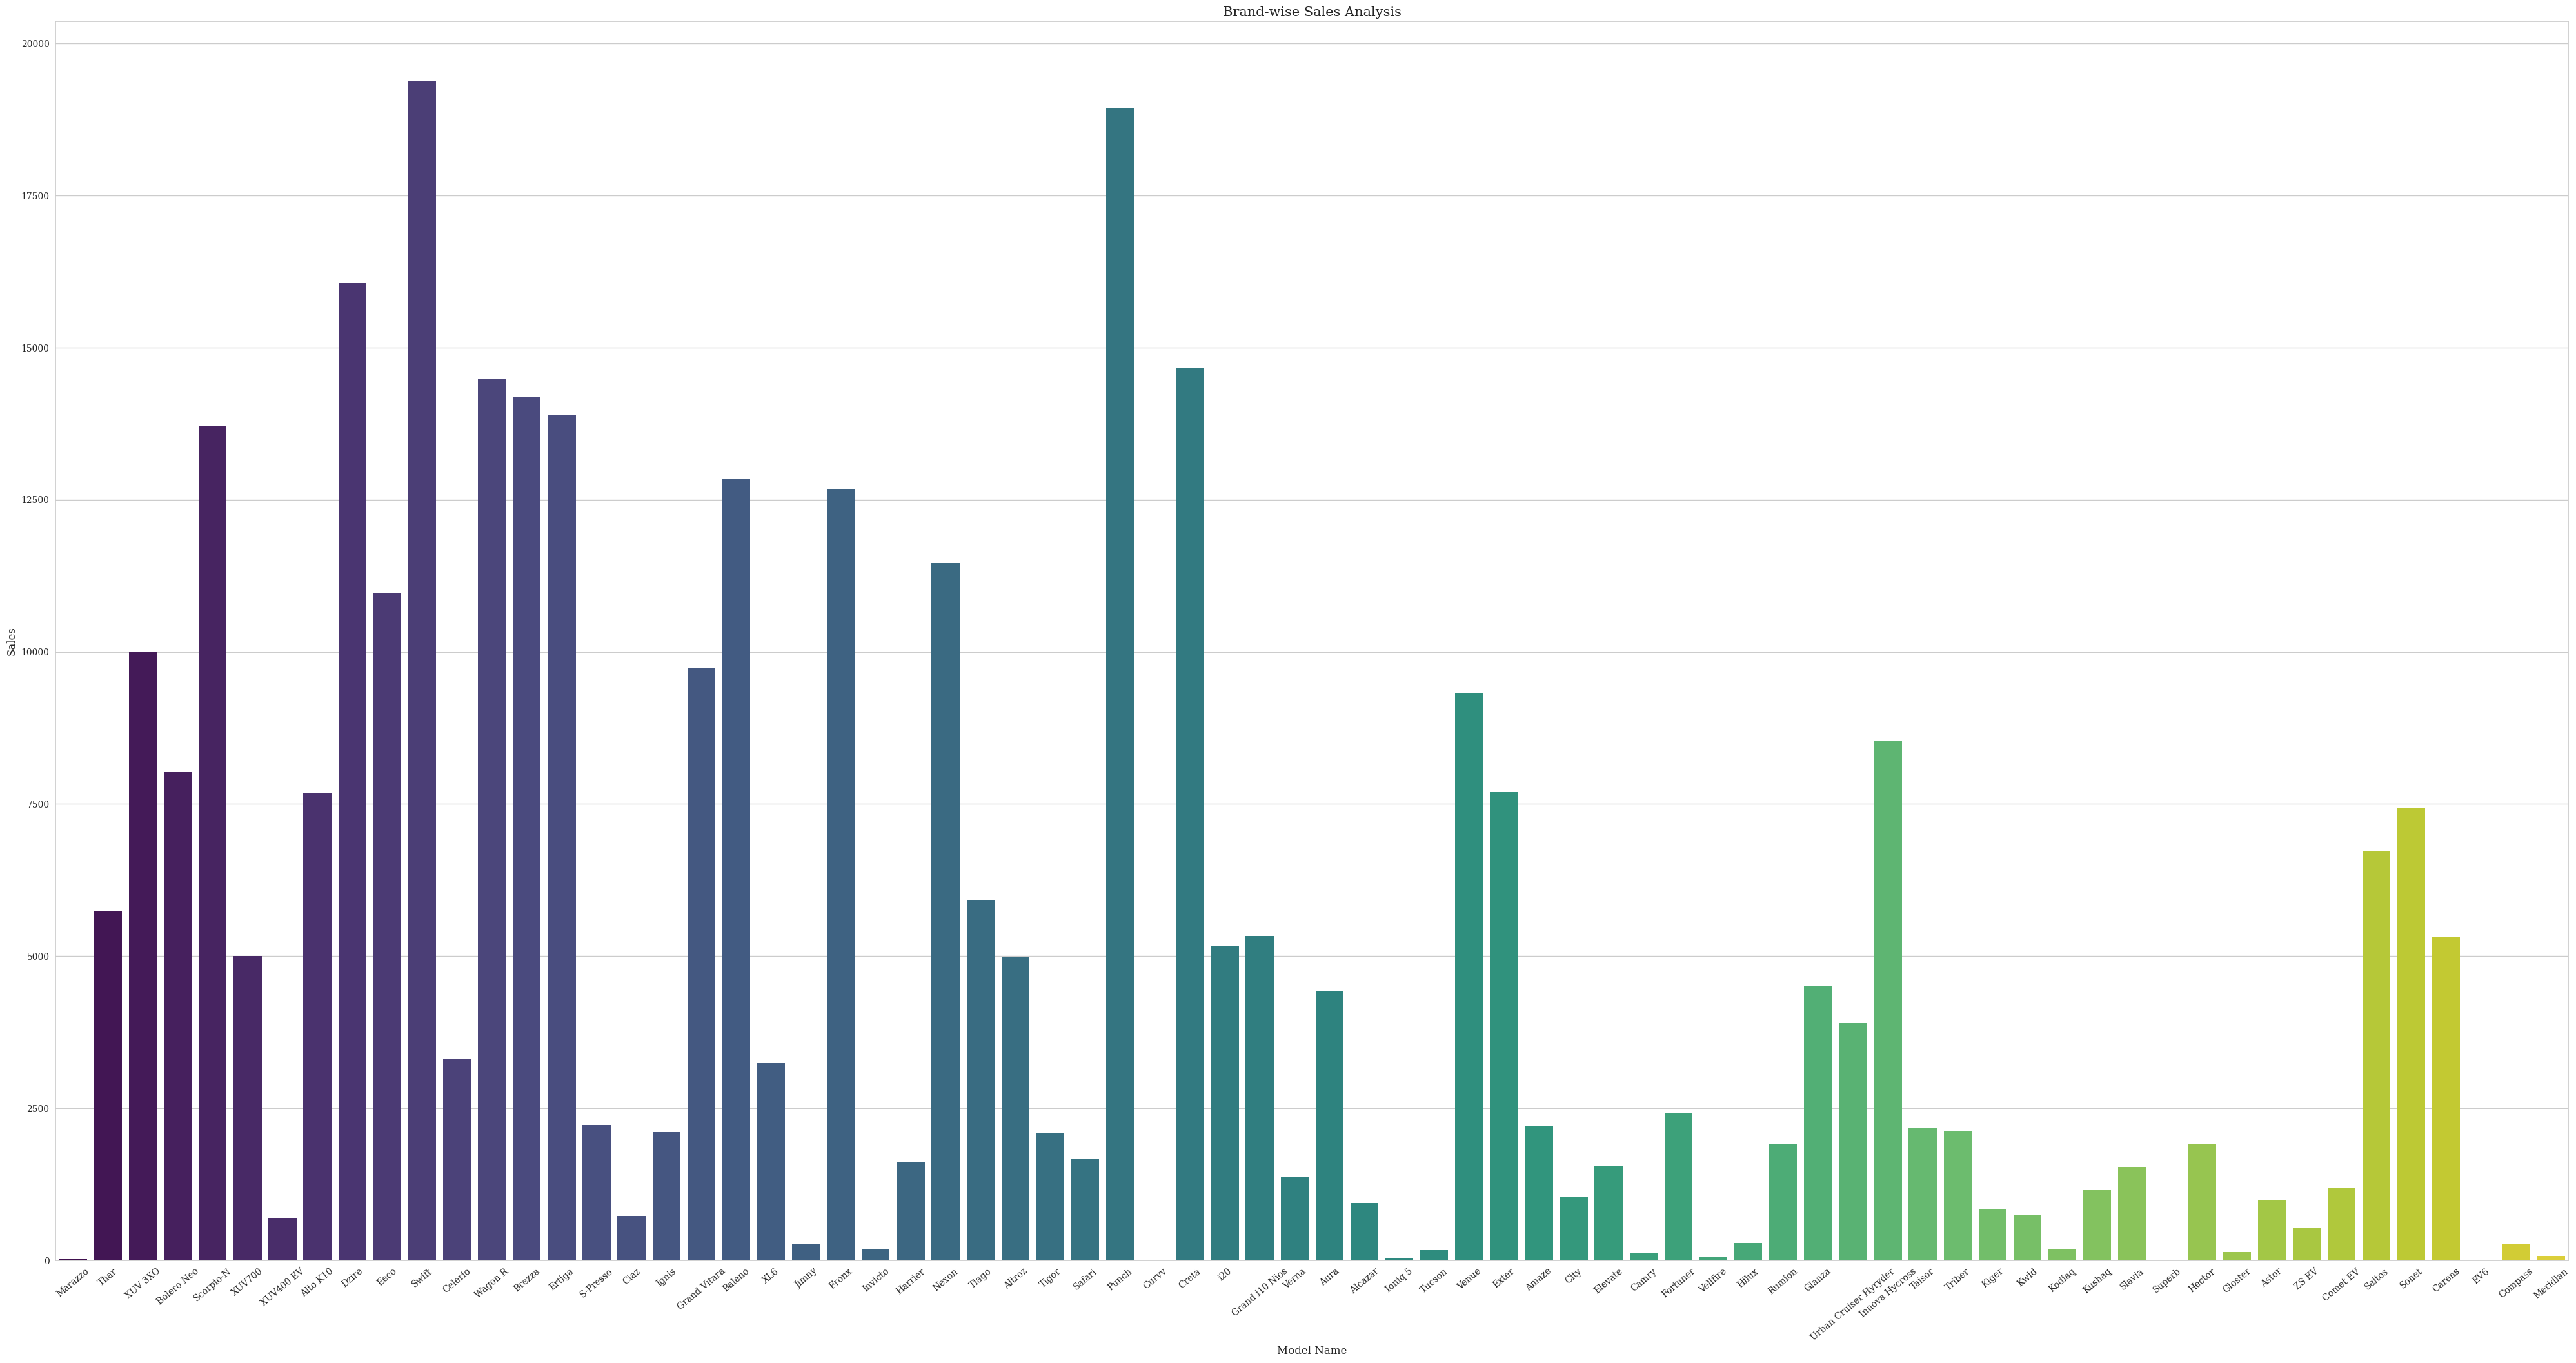

In [ ]:
sns.catplot(kind='bar', data=df3.replace('-', 0), x='Model Name', y='May', palette='viridis', ci=None, height=20, aspect=2) # Replace hyphens with 0
sns.despine(right=False, top=False)
plt.tick_params(axis='x', rotation=40)
plt.xlabel('Model Name',family='serif', size=12)
plt.ylabel('Sales', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title('Brand-wise Sales Analysis', family='serif', size=15);

<ipython-input-148-567e09fbc211>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  sns.catplot(kind='bar', data=df3.replace('-', 0), x='Model Name', y='june', palette='viridis', ci=None, height=20, aspect=2) # Replace hyphens with 0
<ipython-input-148-567e09fbc211>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(kind='bar', data=df3.replace('-', 0), x='Model Name', y='june', palette='viridis', ci=None, height=20, aspect=2) # Replace hyphens with 0
<ipython-input-148-567e09fbc211>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.catplot(kind='bar', data=df3.r

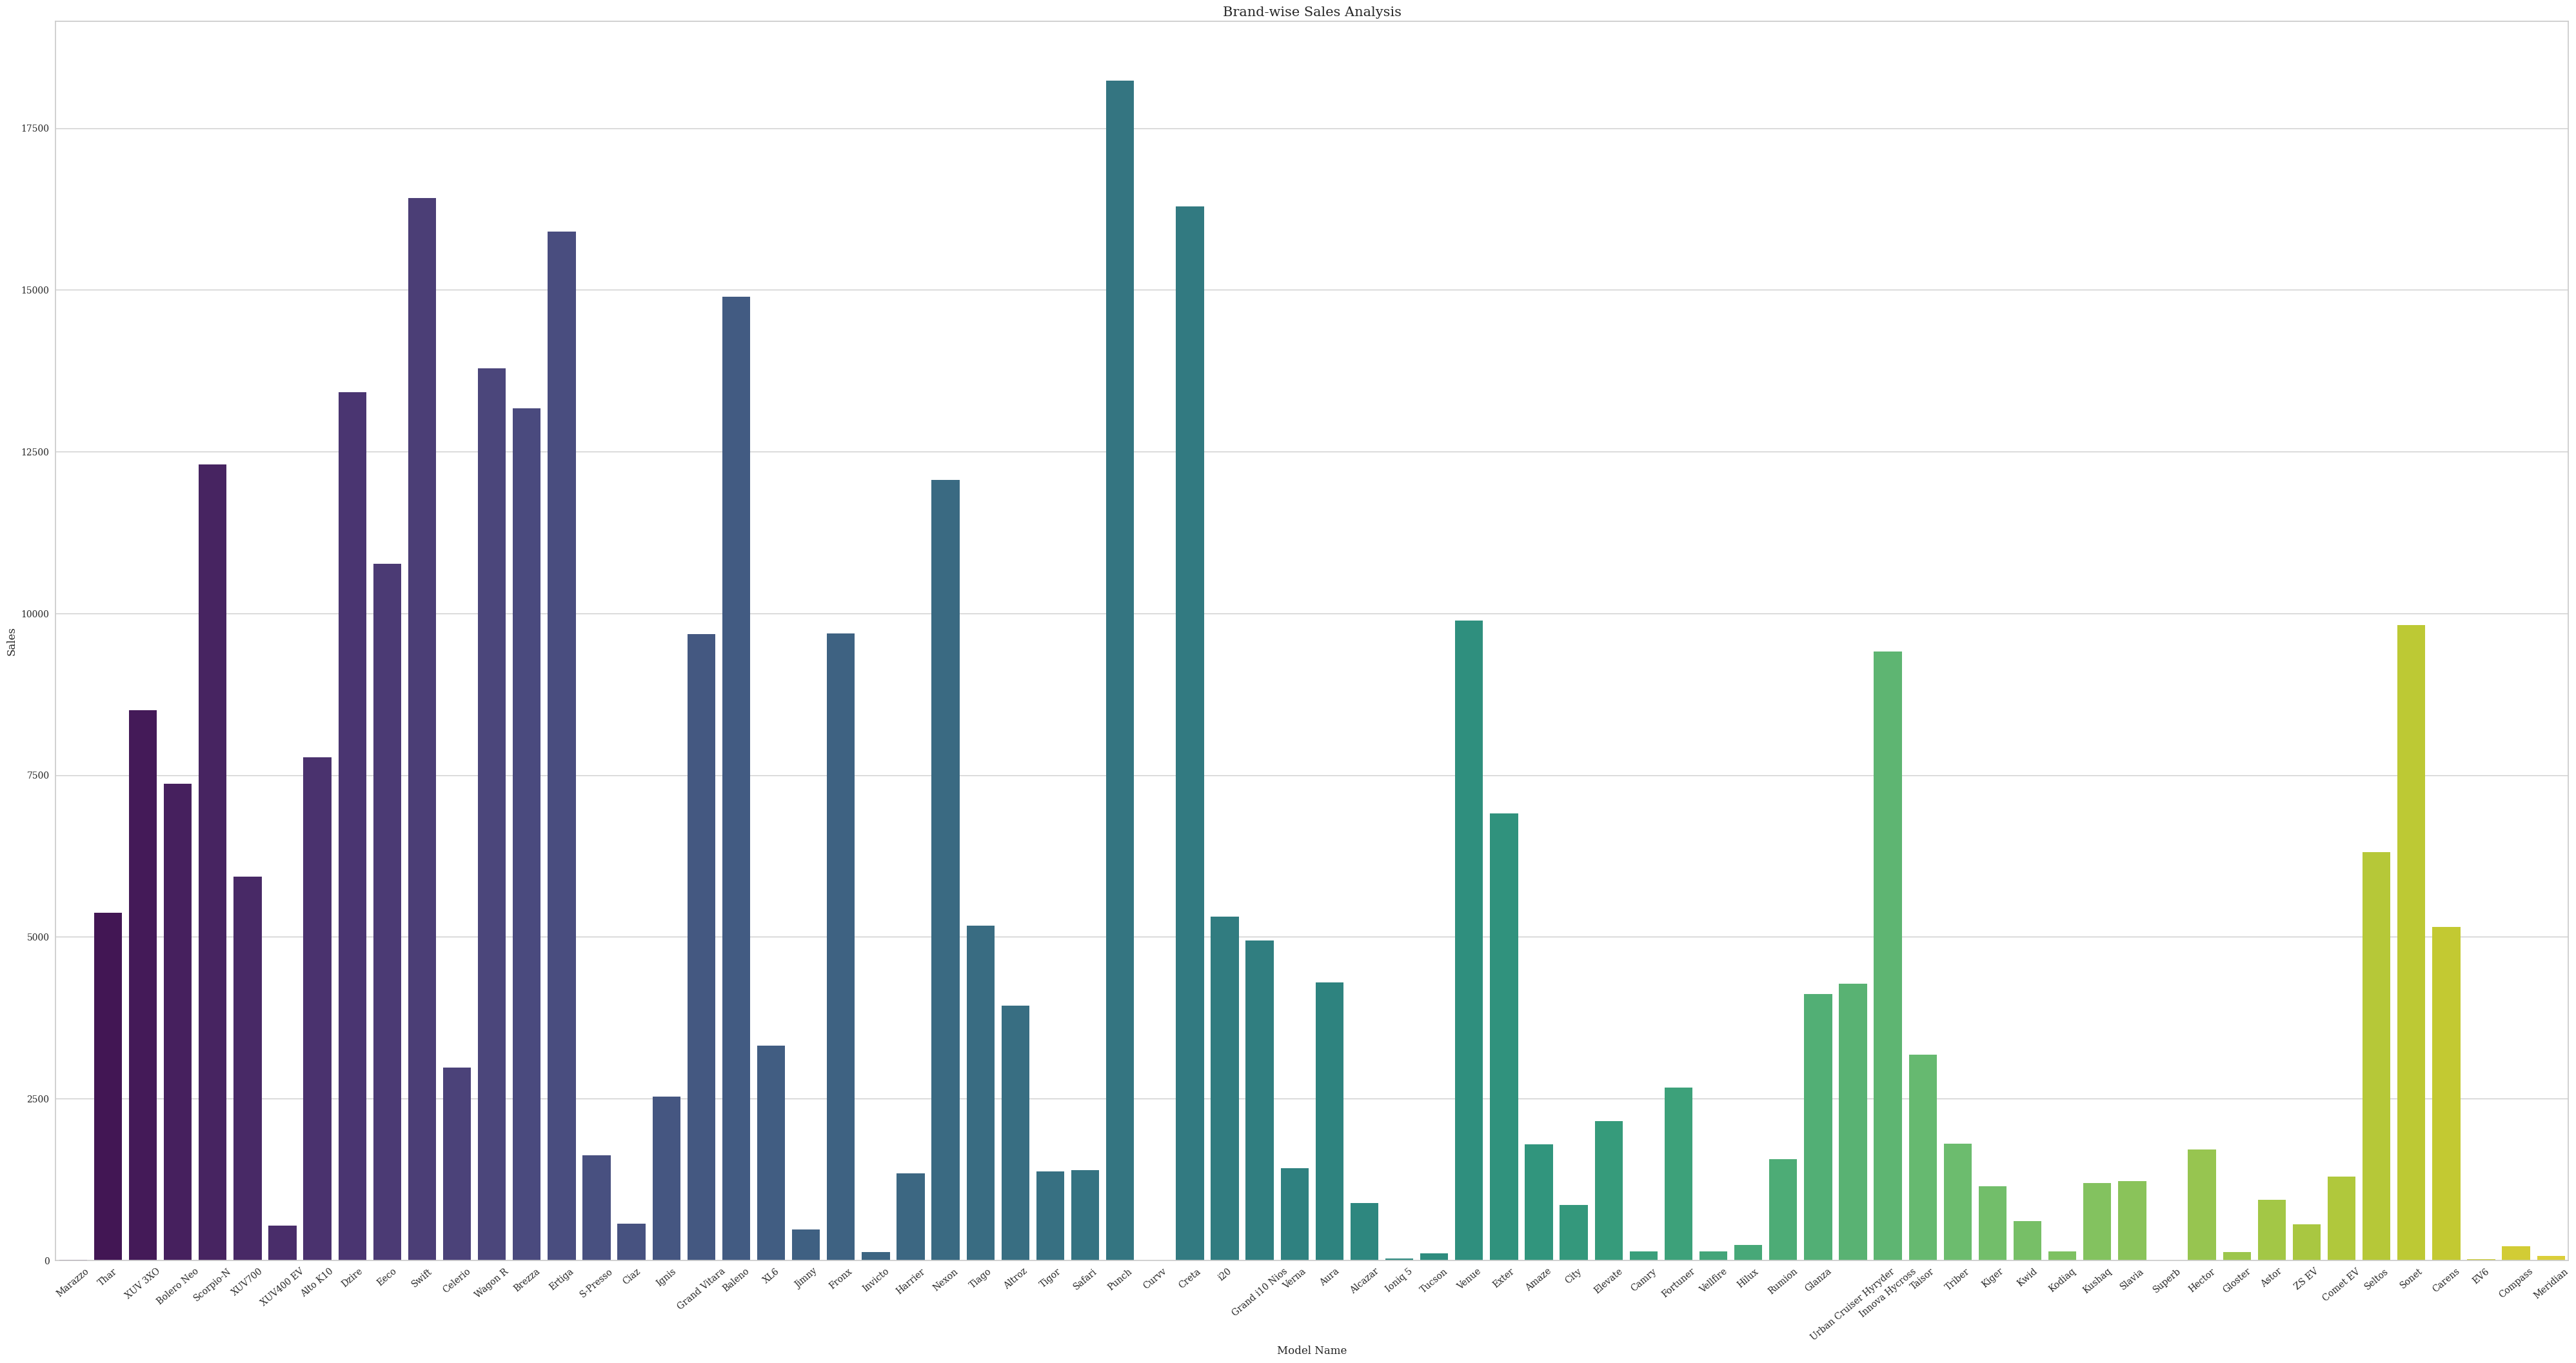

In [ ]:
sns.catplot(kind='bar', data=df3.replace('-', 0), x='Model Name', y='june', palette='viridis', ci=None, height=20, aspect=2) # Replace hyphens with 0
sns.despine(right=False, top=False)
plt.tick_params(axis='x', rotation=40)
plt.xlabel('Model Name',family='serif', size=12)
plt.ylabel('Sales', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title('Brand-wise Sales Analysis', family='serif', size=15);

<ipython-input-149-630e8b471b51>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  sns.catplot(kind='bar', data=df3.replace('-', 0), x='Model Name', y='July', palette='viridis', ci=None, height=20, aspect=2) # Replace hyphens with 0
<ipython-input-149-630e8b471b51>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(kind='bar', data=df3.replace('-', 0), x='Model Name', y='July', palette='viridis', ci=None, height=20, aspect=2) # Replace hyphens with 0
<ipython-input-149-630e8b471b51>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.catplot(kind='bar', data=df3.r

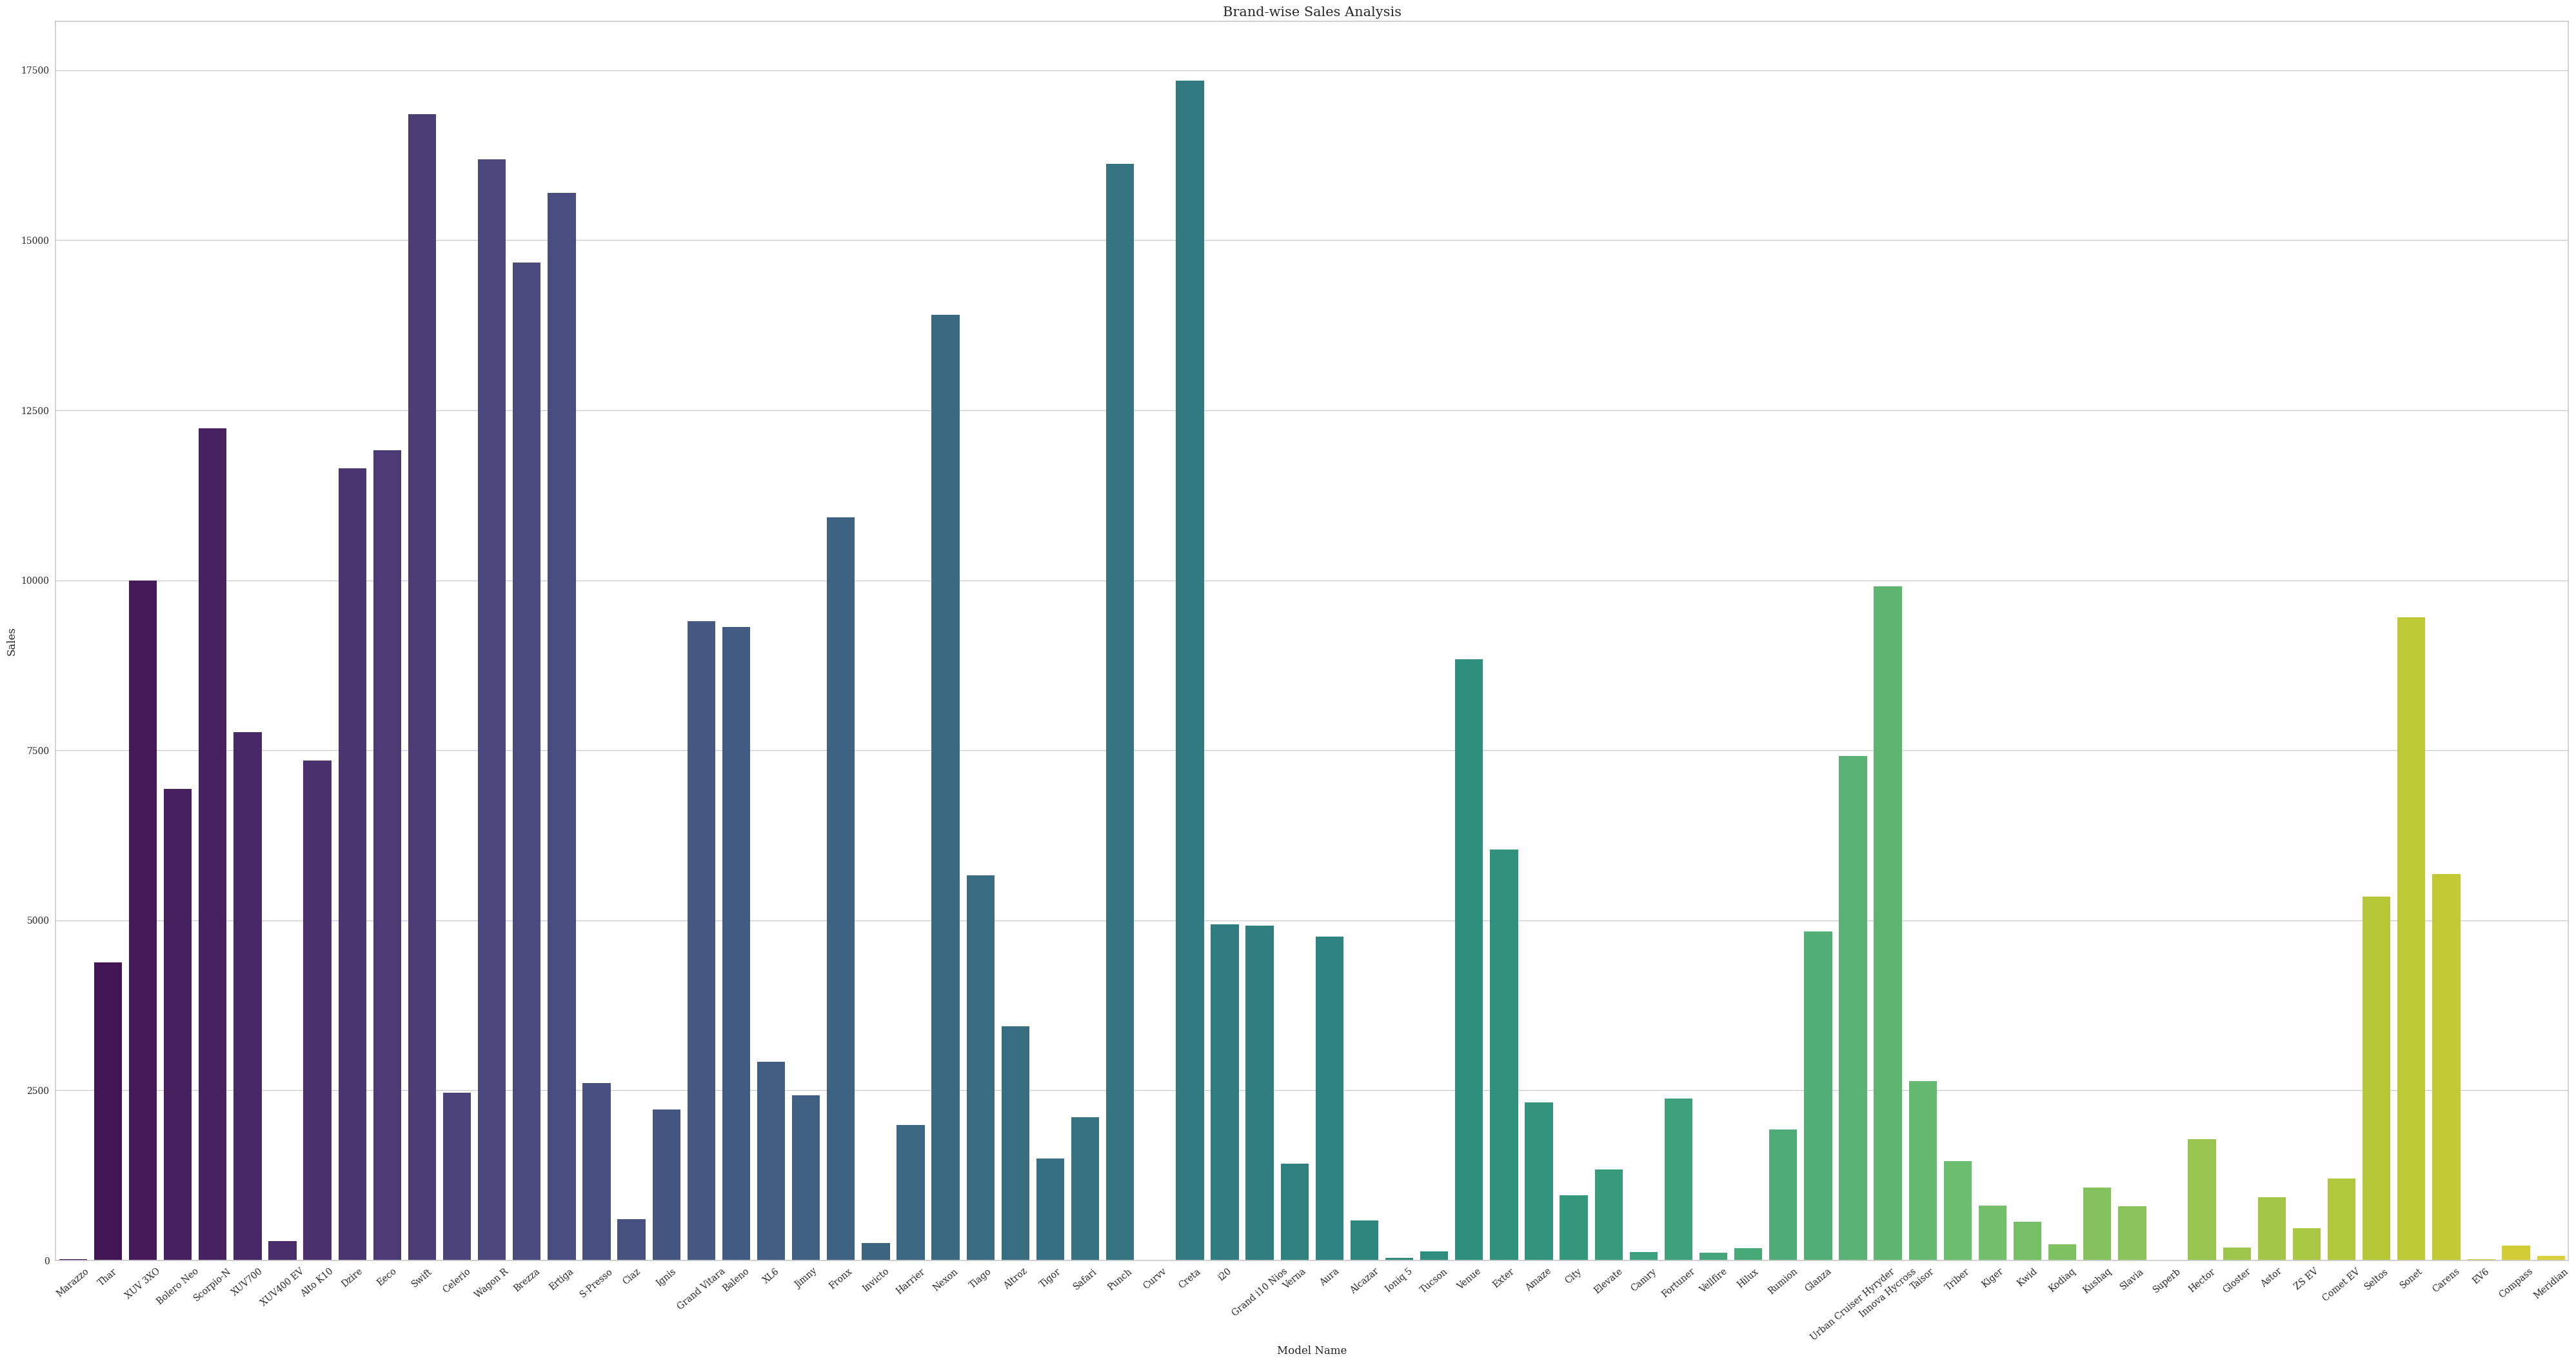

In [ ]:
sns.catplot(kind='bar', data=df3.replace('-', 0), x='Model Name', y='July', palette='viridis', ci=None, height=20, aspect=2) # Replace hyphens with 0
sns.despine(right=False, top=False)
plt.tick_params(axis='x', rotation=40)
plt.xlabel('Model Name',family='serif', size=12)
plt.ylabel('Sales', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title('Brand-wise Sales Analysis', family='serif', size=15);

<ipython-input-150-672bf8268446>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  sns.catplot(kind='bar', data=df3.replace('-', 0), x='Model Name', y=' August', palette='viridis', ci=None, height=20, aspect=2) # Replace hyphens with 0
<ipython-input-150-672bf8268446>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(kind='bar', data=df3.replace('-', 0), x='Model Name', y=' August', palette='viridis', ci=None, height=20, aspect=2) # Replace hyphens with 0
<ipython-input-150-672bf8268446>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.catplot(kind='bar', data

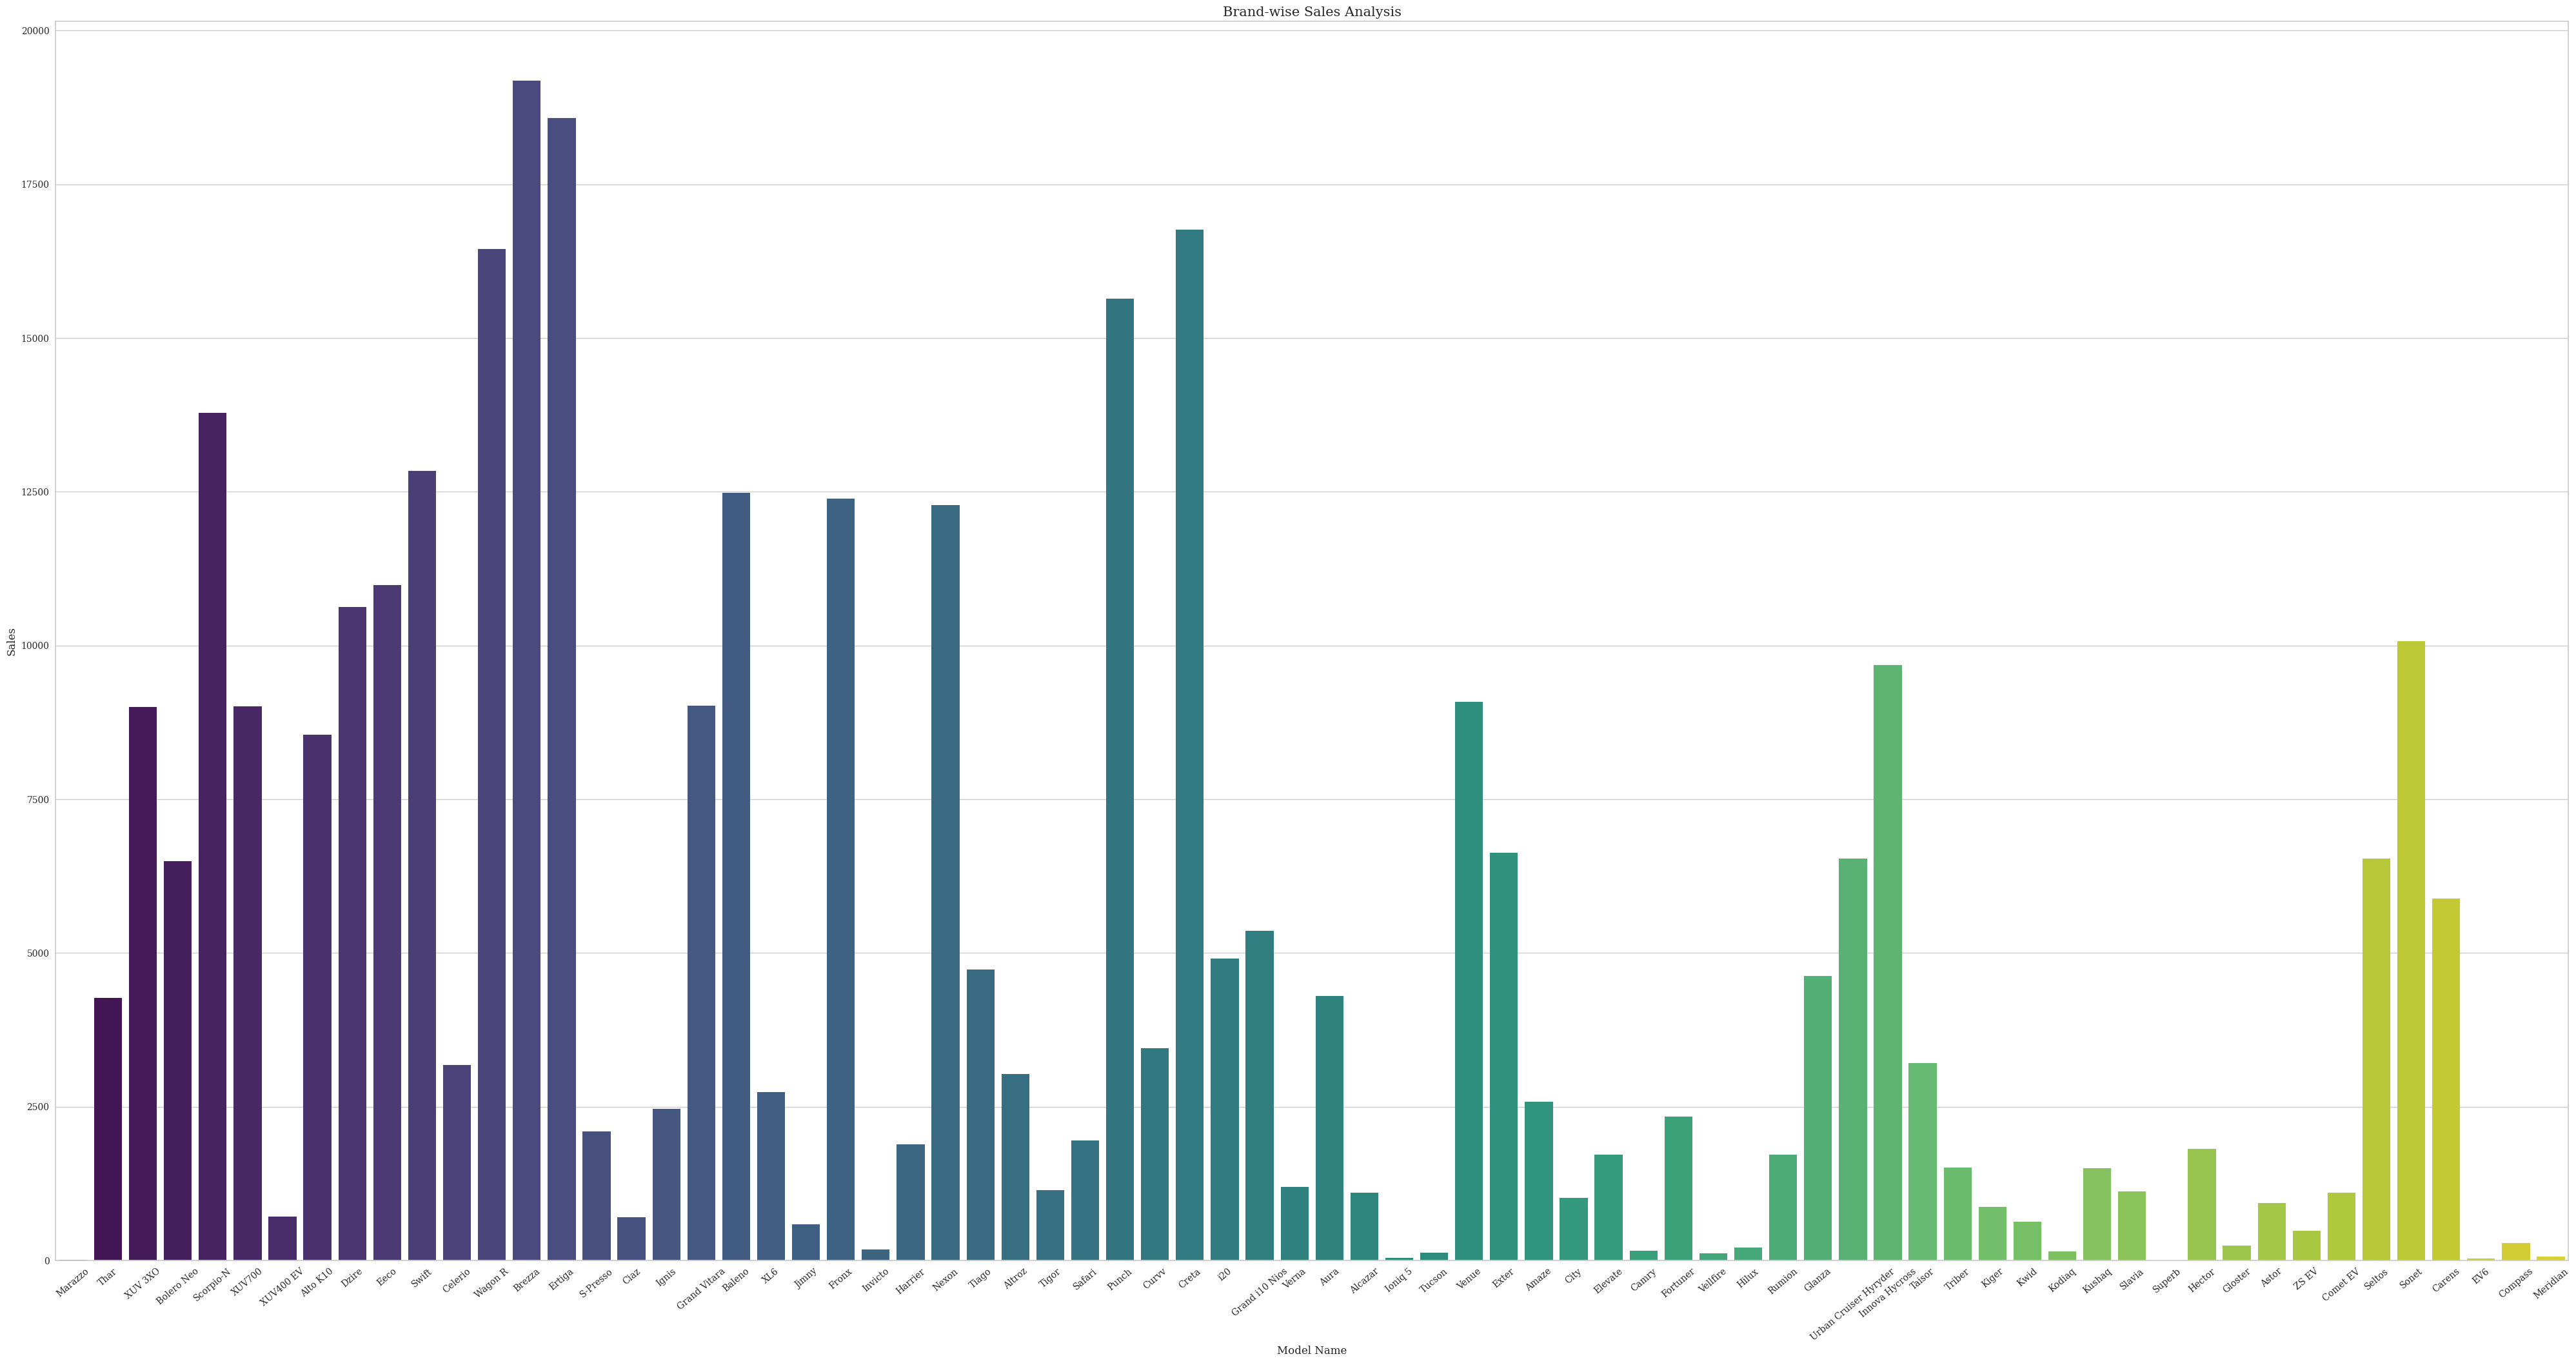

In [ ]:
sns.catplot(kind='bar', data=df3.replace('-', 0), x='Model Name', y=' August', palette='viridis', ci=None, height=20, aspect=2) # Replace hyphens with 0
sns.despine(right=False, top=False)
plt.tick_params(axis='x', rotation=40)
plt.xlabel('Model Name',family='serif', size=12)
plt.ylabel('Sales', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title('Brand-wise Sales Analysis', family='serif', size=15);

<ipython-input-151-0fed6a74afcd>:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df3 = df3.replace('-', 0)


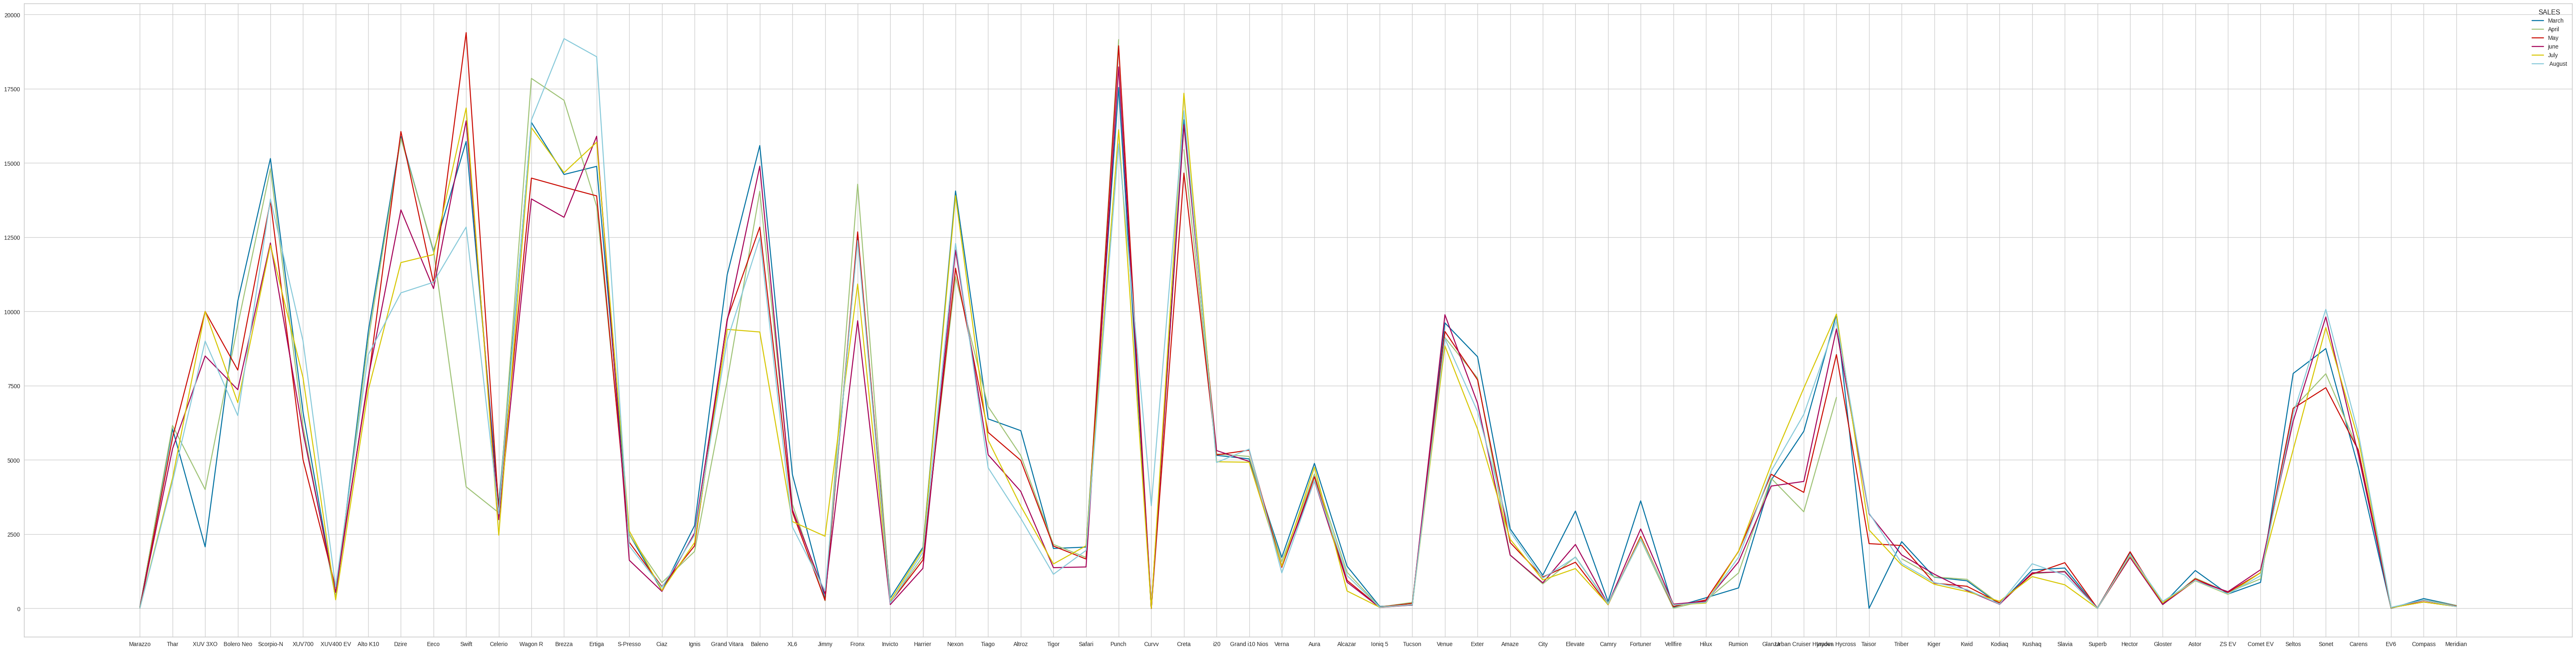

In [ ]:
!pip install pandas
import pandas as pd
import matplotlib.pyplot as plt

!pip install pandas
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'April' column to numeric, replacing non-numeric values with NaN
df3['April'] = pd.to_numeric(df3['April'], errors='coerce')

plt.figure(figsize=(80,20))

# Replace hyphens with 0 across the entire DataFrame
df3 = df3.replace('-', 0)

plt.plot(df3["Model Name"],df3['March'], label='March')
plt.plot(df3["Model Name"],df3['April'], label='April')
plt.plot(df3["Model Name"],df3['May'], label='May')
plt.plot(df3["Model Name"],df3['june'], label='june')
plt.plot(df3["Model Name"],df3['July'], label='July')
plt.plot(df3["Model Name"],df3[' August'], label=' August')

plt.legend(title="SALES", loc="best")
plt.show()

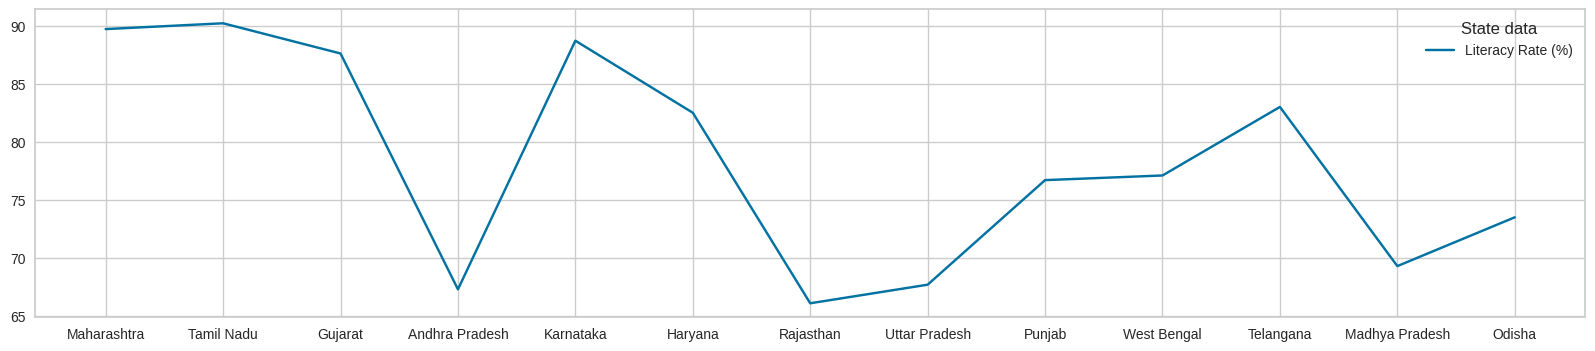

In [ ]:
plt.figure(figsize=(20,4))

# Replace hyphens with 0 across the entire DataFrame
df5 = df5.replace('-', 0)

plt.plot(df5["State"],df5['Literacy Rate (%)'], label='Literacy Rate (%)')



plt.legend(title="State data", loc="best")
plt.show()

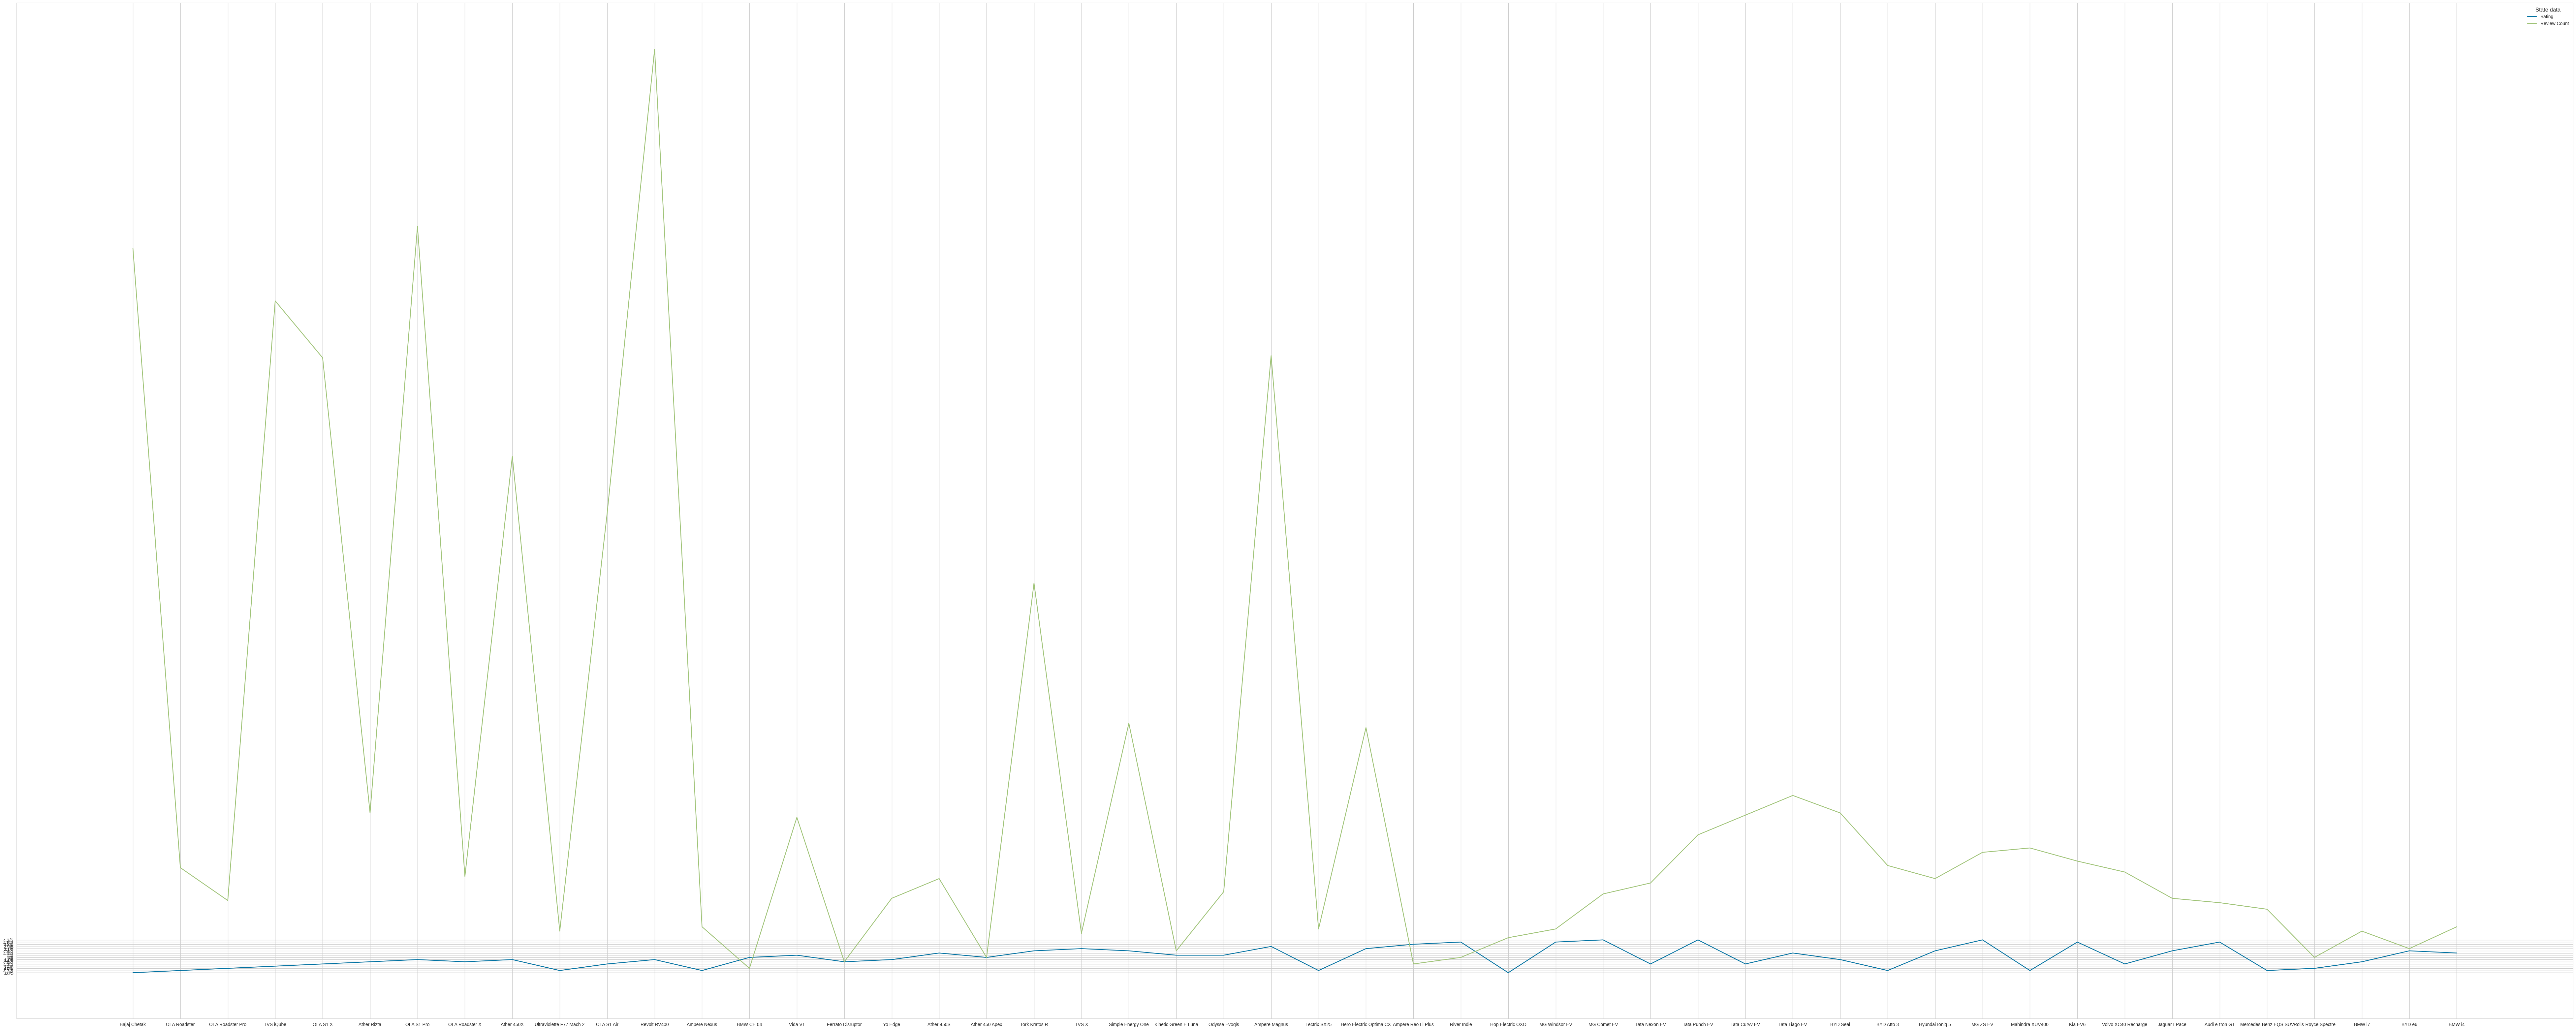

In [ ]:
plt.figure(figsize=(100,40))

# Replace hyphens with 0 across the entire DataFrame
df2 = df2.replace('-', 0)
plt.plot(df2["Name"],df2['Rating'], label='Rating')
plt.plot(df2["Name"],df2['Review Count'], label='Review Count')

plt.legend(title="State data", loc="best")
plt.show()

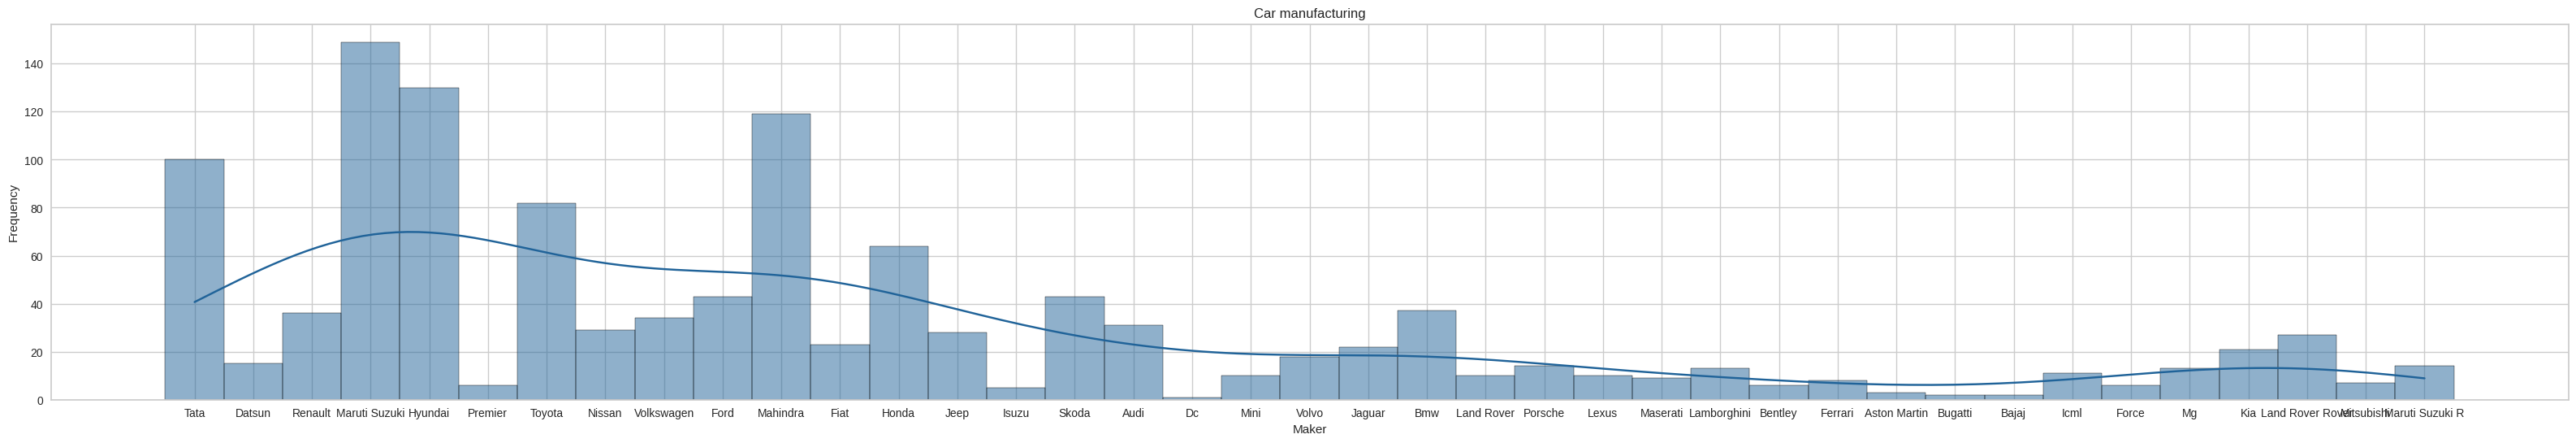

In [ ]:
plt.figure(figsize=(40, 6))
sns.histplot(df4['Make'], bins=20, kde=True, color='#206399')
plt.title('Car manufacturing')
plt.xlabel('Maker')
plt.ylabel('Frequency')
plt.show()

#Data Visualization
I. Creating a correlation heatmap which will show a graphical representation of a correlation matrix representing the correlation between different variables.

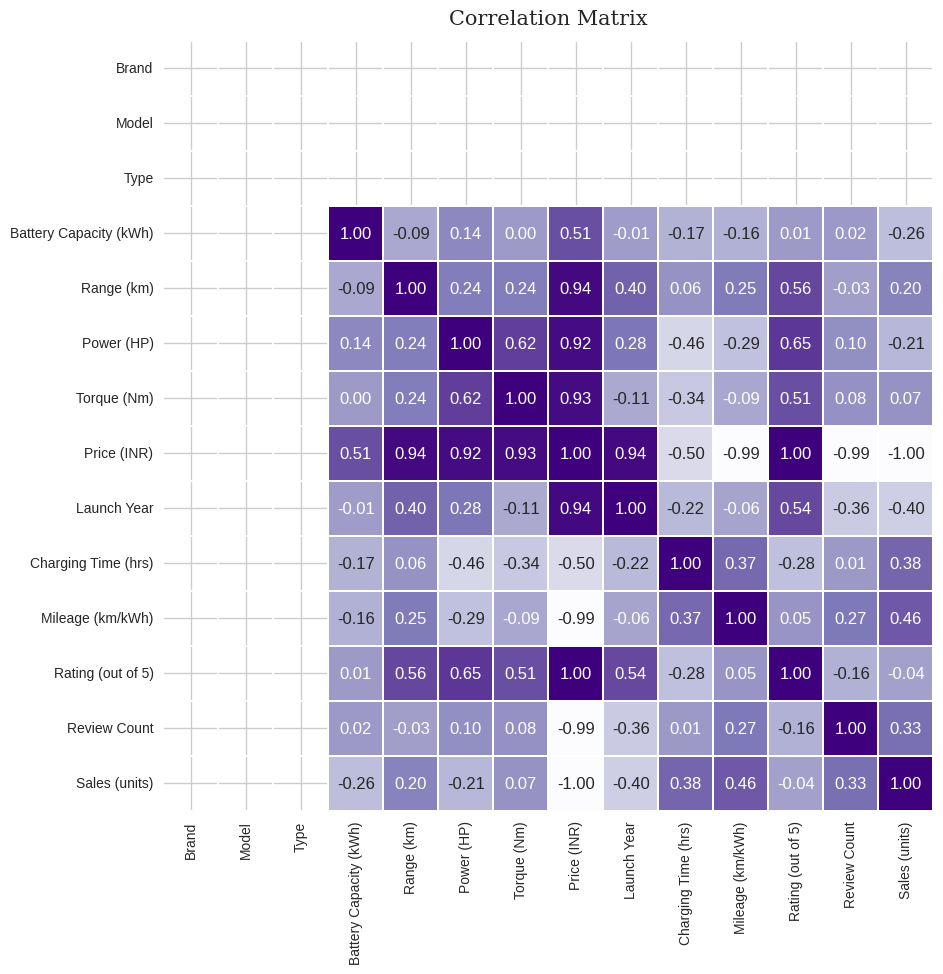

In [ ]:
# Convert columns to numeric type before calculating correlation
for col in df1.columns:
    try:
        df1[col] = pd.to_numeric(df1[col], errors='coerce')
    except:
        pass

plt.figure(figsize=(10,10))
sns.heatmap(data=df1.corr(), annot=True, cmap='Purples', cbar=False, square=True, fmt='.2f', linewidths=.3)
plt.title('Correlation Matrix', family='serif', size=15, pad=12);

Brands with the most number of cars in the Indian market

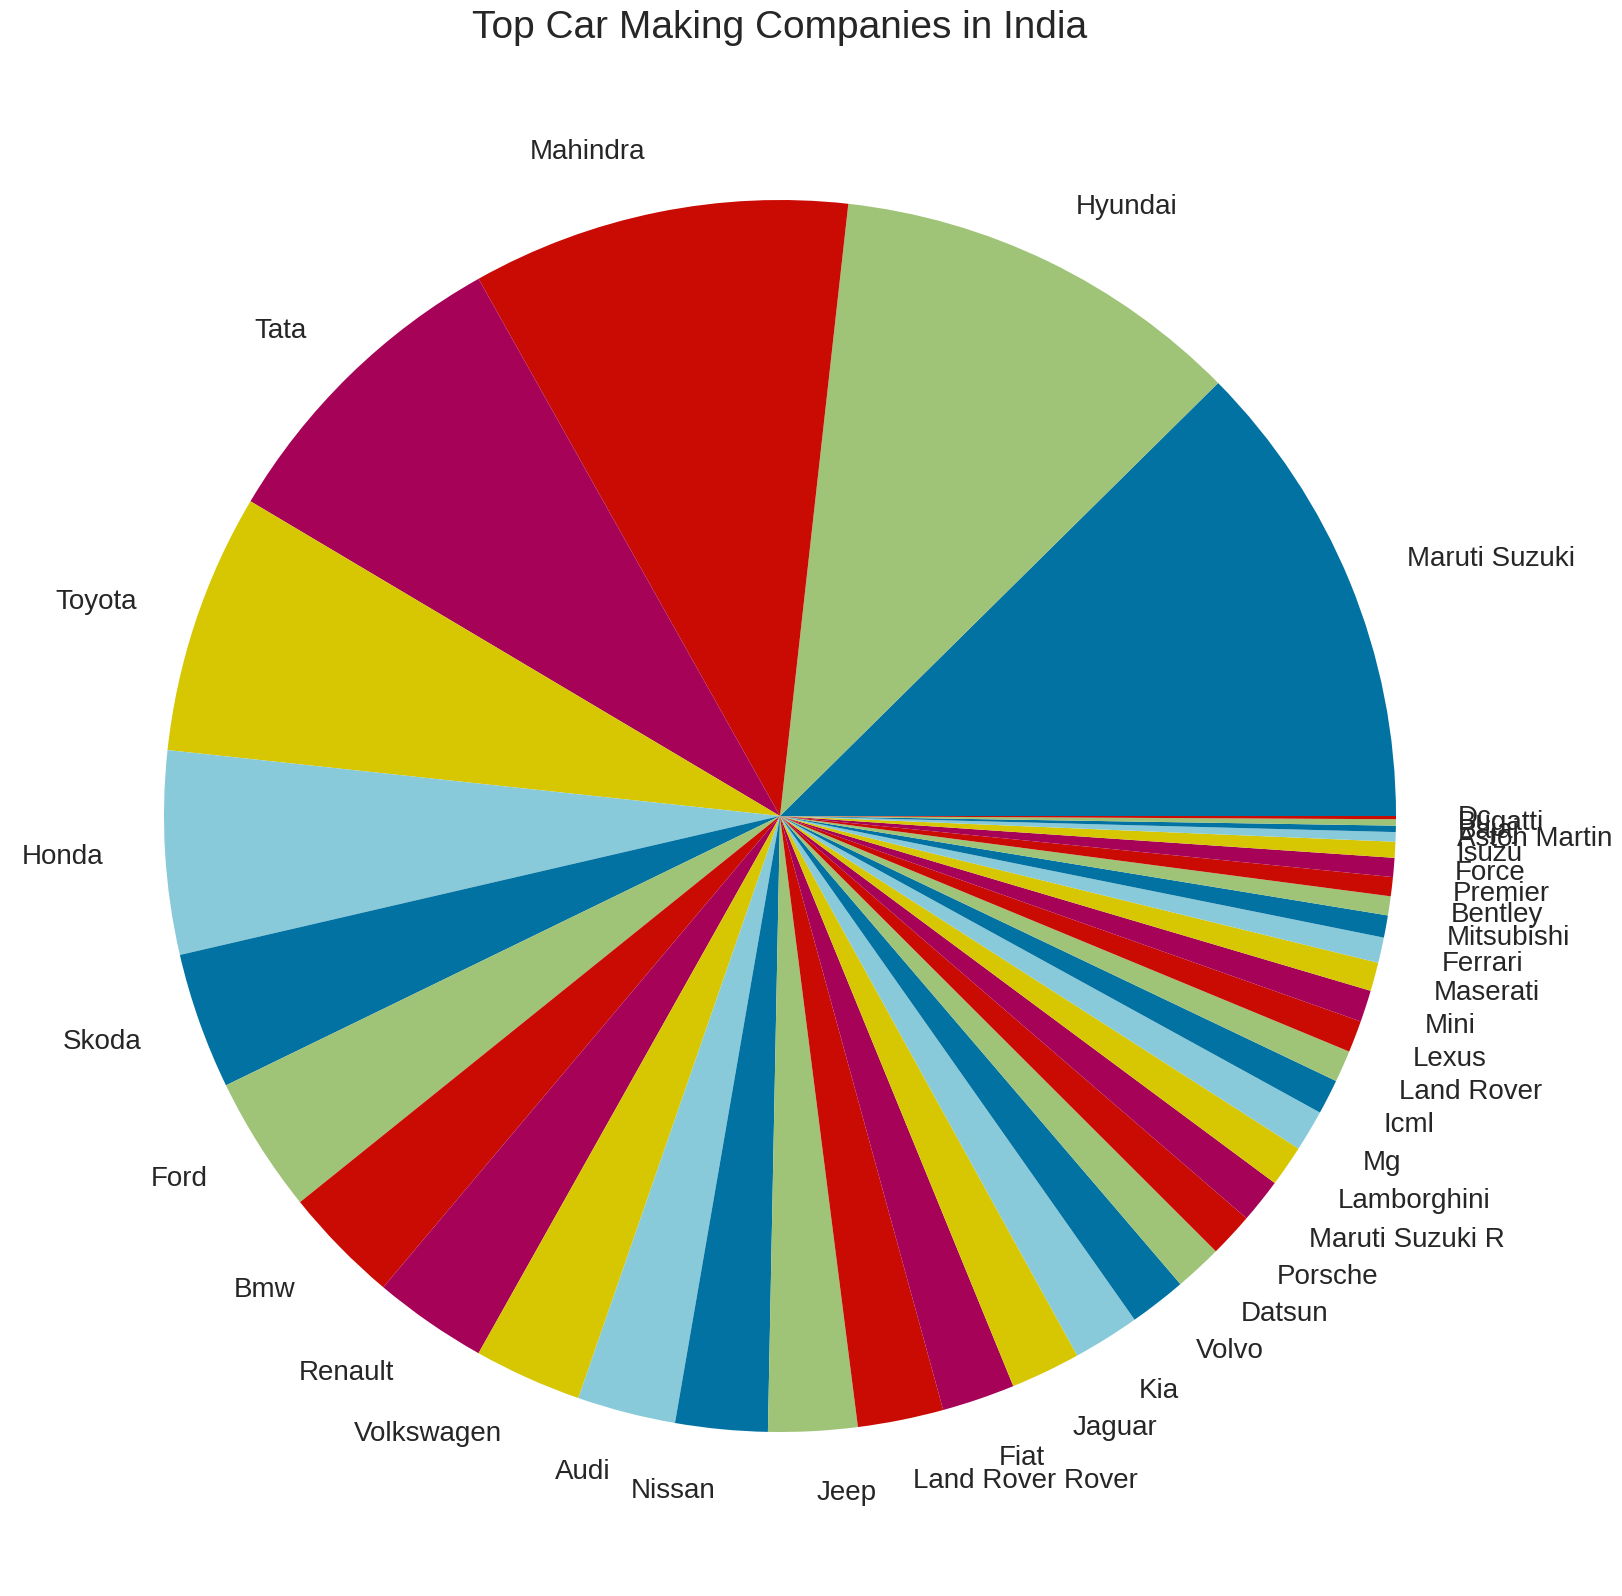

In [ ]:
fig = plt.figure(figsize = (20,20))
ax = fig.subplots()
df4.Make.value_counts().plot(ax=ax,fontsize=20, kind='pie')
ax.set_ylabel("")
ax.set_title("Top Car Making Companies in India", fontsize=28)
plt.show()

Conclusion:
Maruti Suzuki has more car variants than any other company in India.

The Top 5 companies with more than car variants in India are Maruti Suzuki, Hyundai, Mahindra, Tata, and Toyota.

Sports car variants are very low in Indian Market.

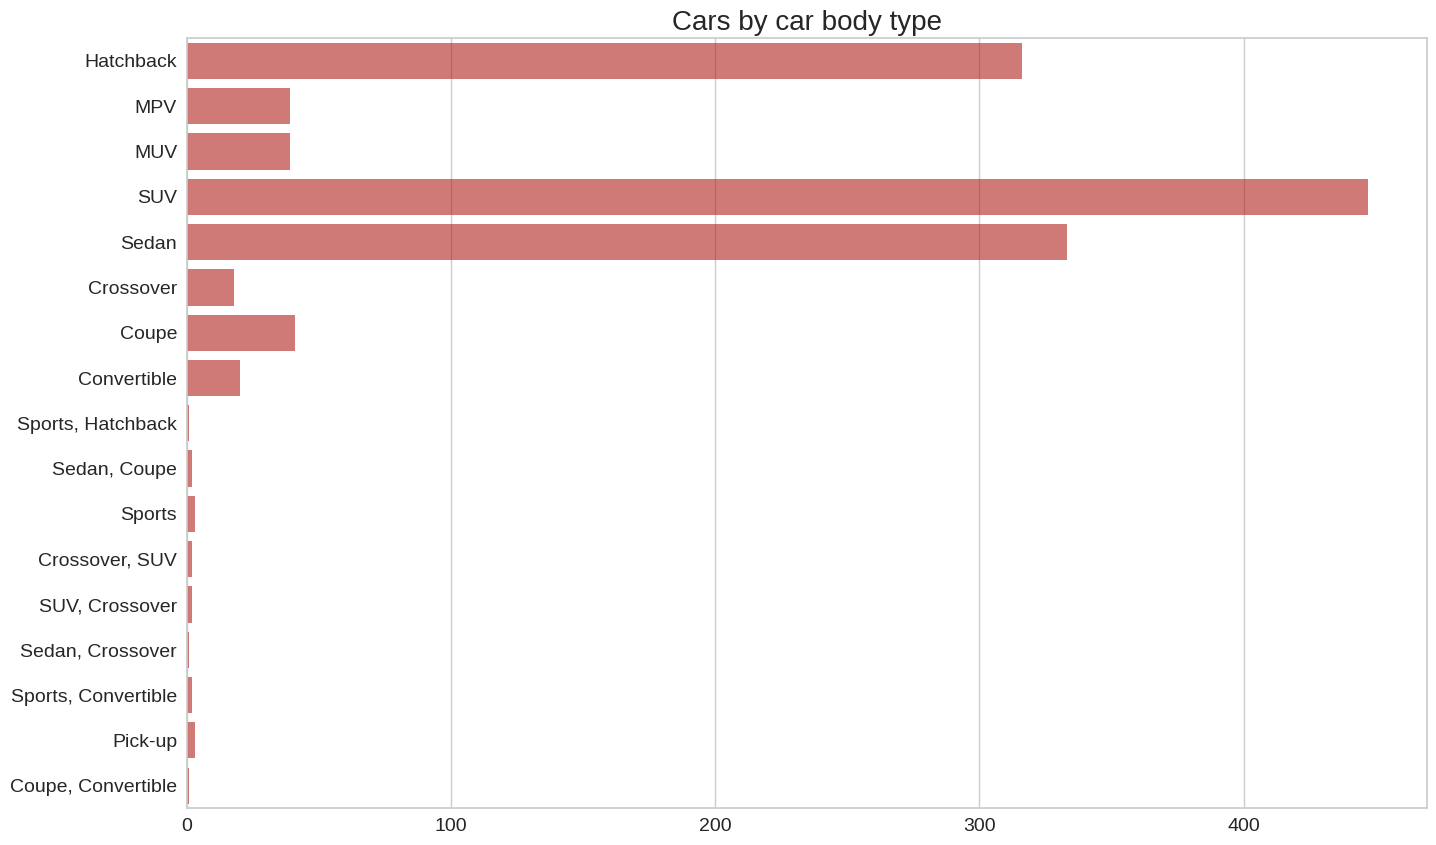

In [ ]:
#Which car body type is favourable for Indian Market
plt.figure(figsize=(16,10))
sns.countplot(data=df4, y='Body_Type',alpha=.6,color='r')
plt.title('Cars by car body type',fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('')
plt.ylabel('');

Conclusion:
Indian market is most favourable for SUVs, Sedans, and Hatchback and slightly favourable for MPV, MUV and Coupe.

In [ ]:
#EX-Showroom Price based on car body type: which body type has more price
PriceByType = df4.groupby('Body_Type').sum().sort_values('Ex-Showroom_Price', ascending=False)
PriceByType = PriceByType.reset_index()
px.bar(x='Body_Type', y ="Ex-Showroom_Price", data_frame=PriceByType)

Now we check the relation between horsepower and price considering different body type

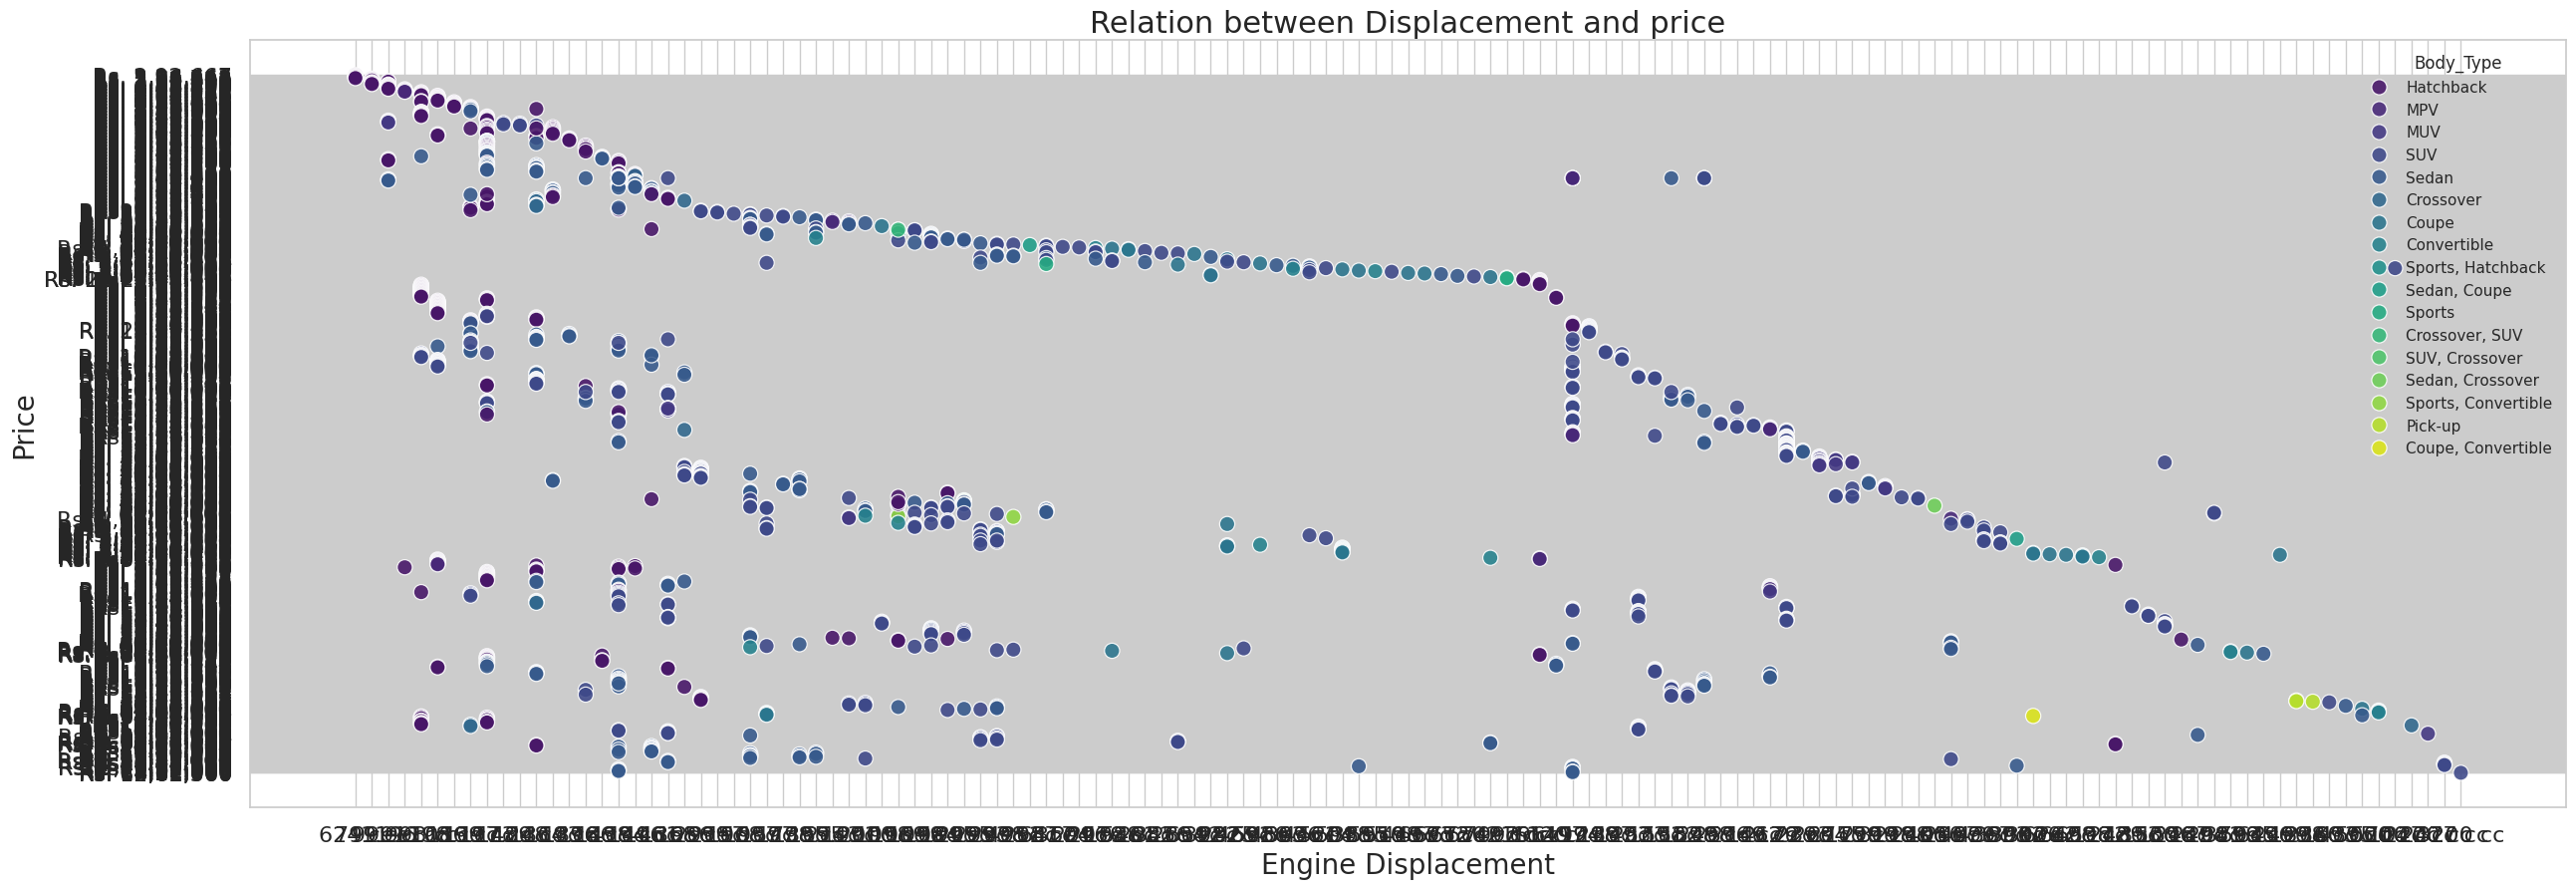

In [ ]:
plt.figure(figsize=(30,10))
sns.scatterplot(data=df4, x='Displacement', y='Ex-Showroom_Price', hue='Body_Type', palette='viridis',alpha=.89, s=120 );
plt.xticks(fontsize=16);
plt.yticks(fontsize=16)

plt.xlabel('Engine Displacement',fontsize=20)
plt.ylabel("Price",fontsize=20)
plt.title('Relation between Displacement and price',fontsize=22);

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



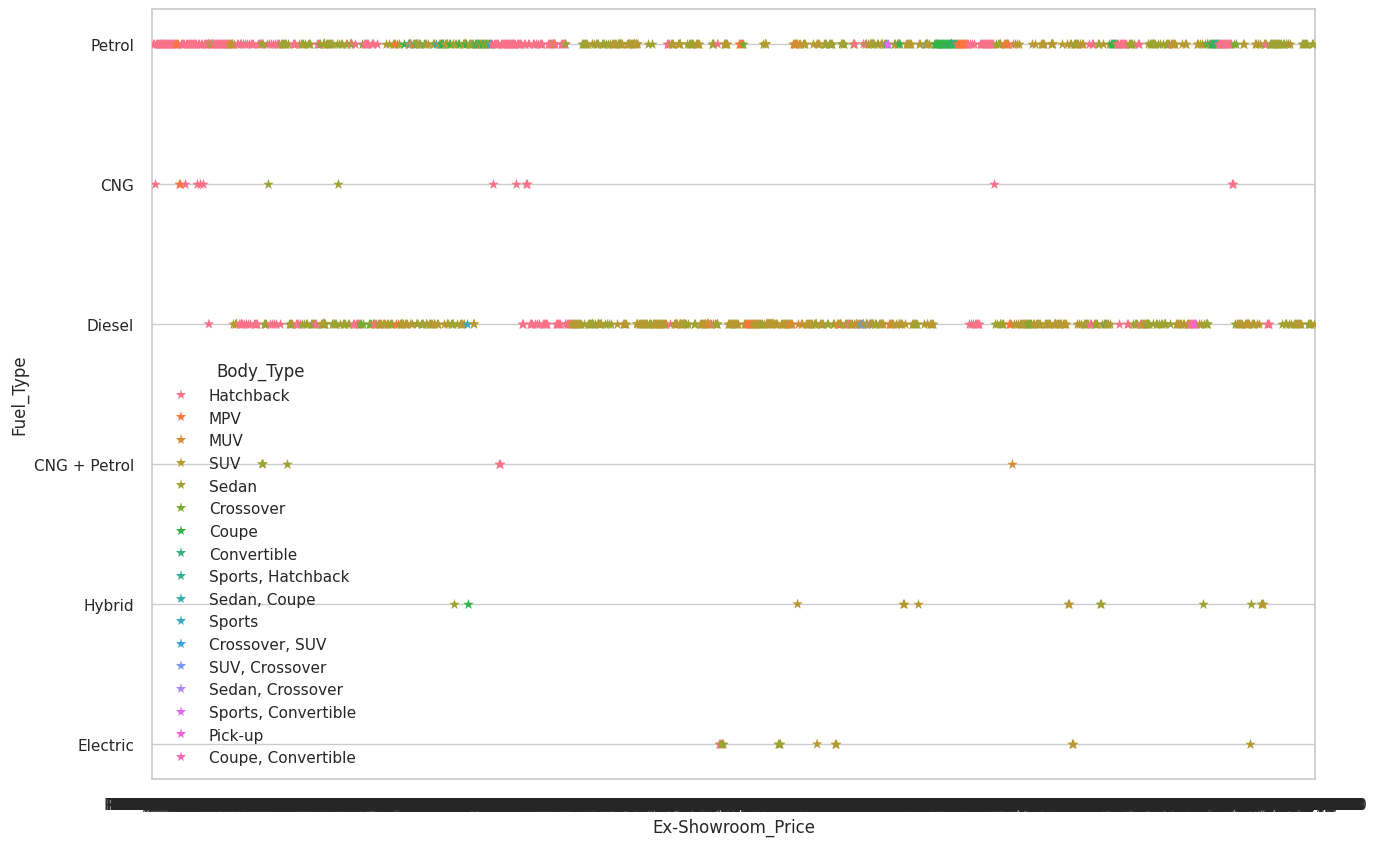

In [ ]:
#Cars count by Engine Fuel Type
sns.set(style = 'whitegrid')
plt.figure(figsize=(15, 10))
sns.stripplot(x='Ex-Showroom_Price' , y='Fuel_Type' ,data=df4, size=8, marker='*', hue="Body_Type")
plt.show()

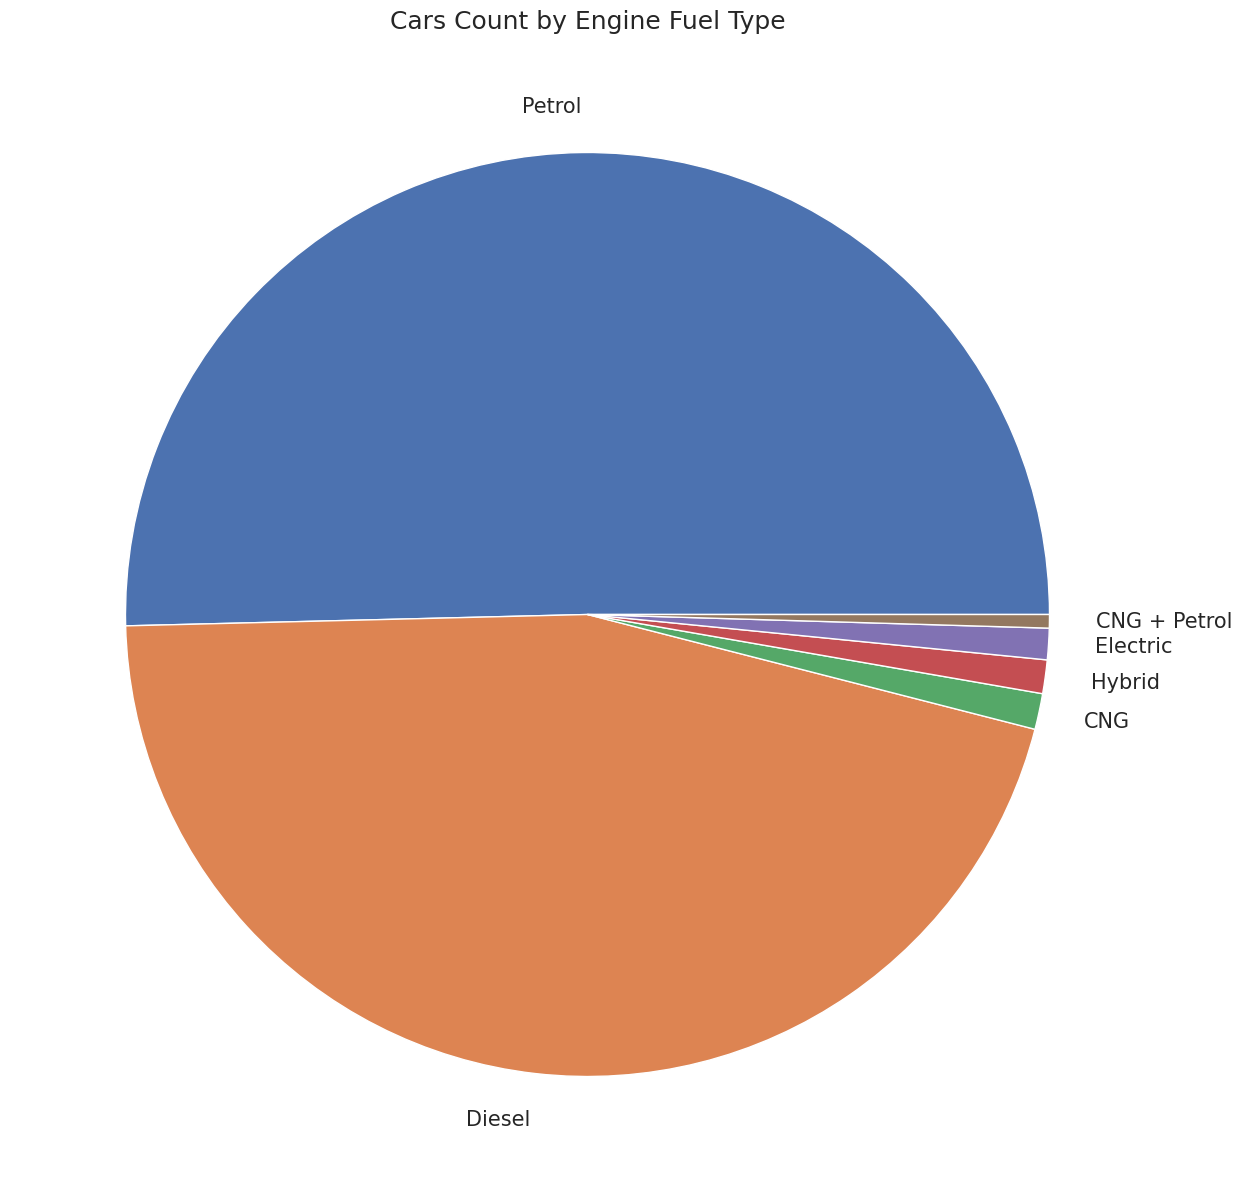

In [ ]:

fig = plt.figure(figsize = (15,15))
ax = fig.subplots()
df4.Fuel_Type.value_counts().plot(ax=ax, fontsize=15, kind='pie')
ax.set_ylabel("")
ax.set_title("Cars Count by Engine Fuel Type", fontsize=18)
plt.show()

In [ ]:
df=df4

Text(0.5, 1.0, 'Relation between Displacement and price')

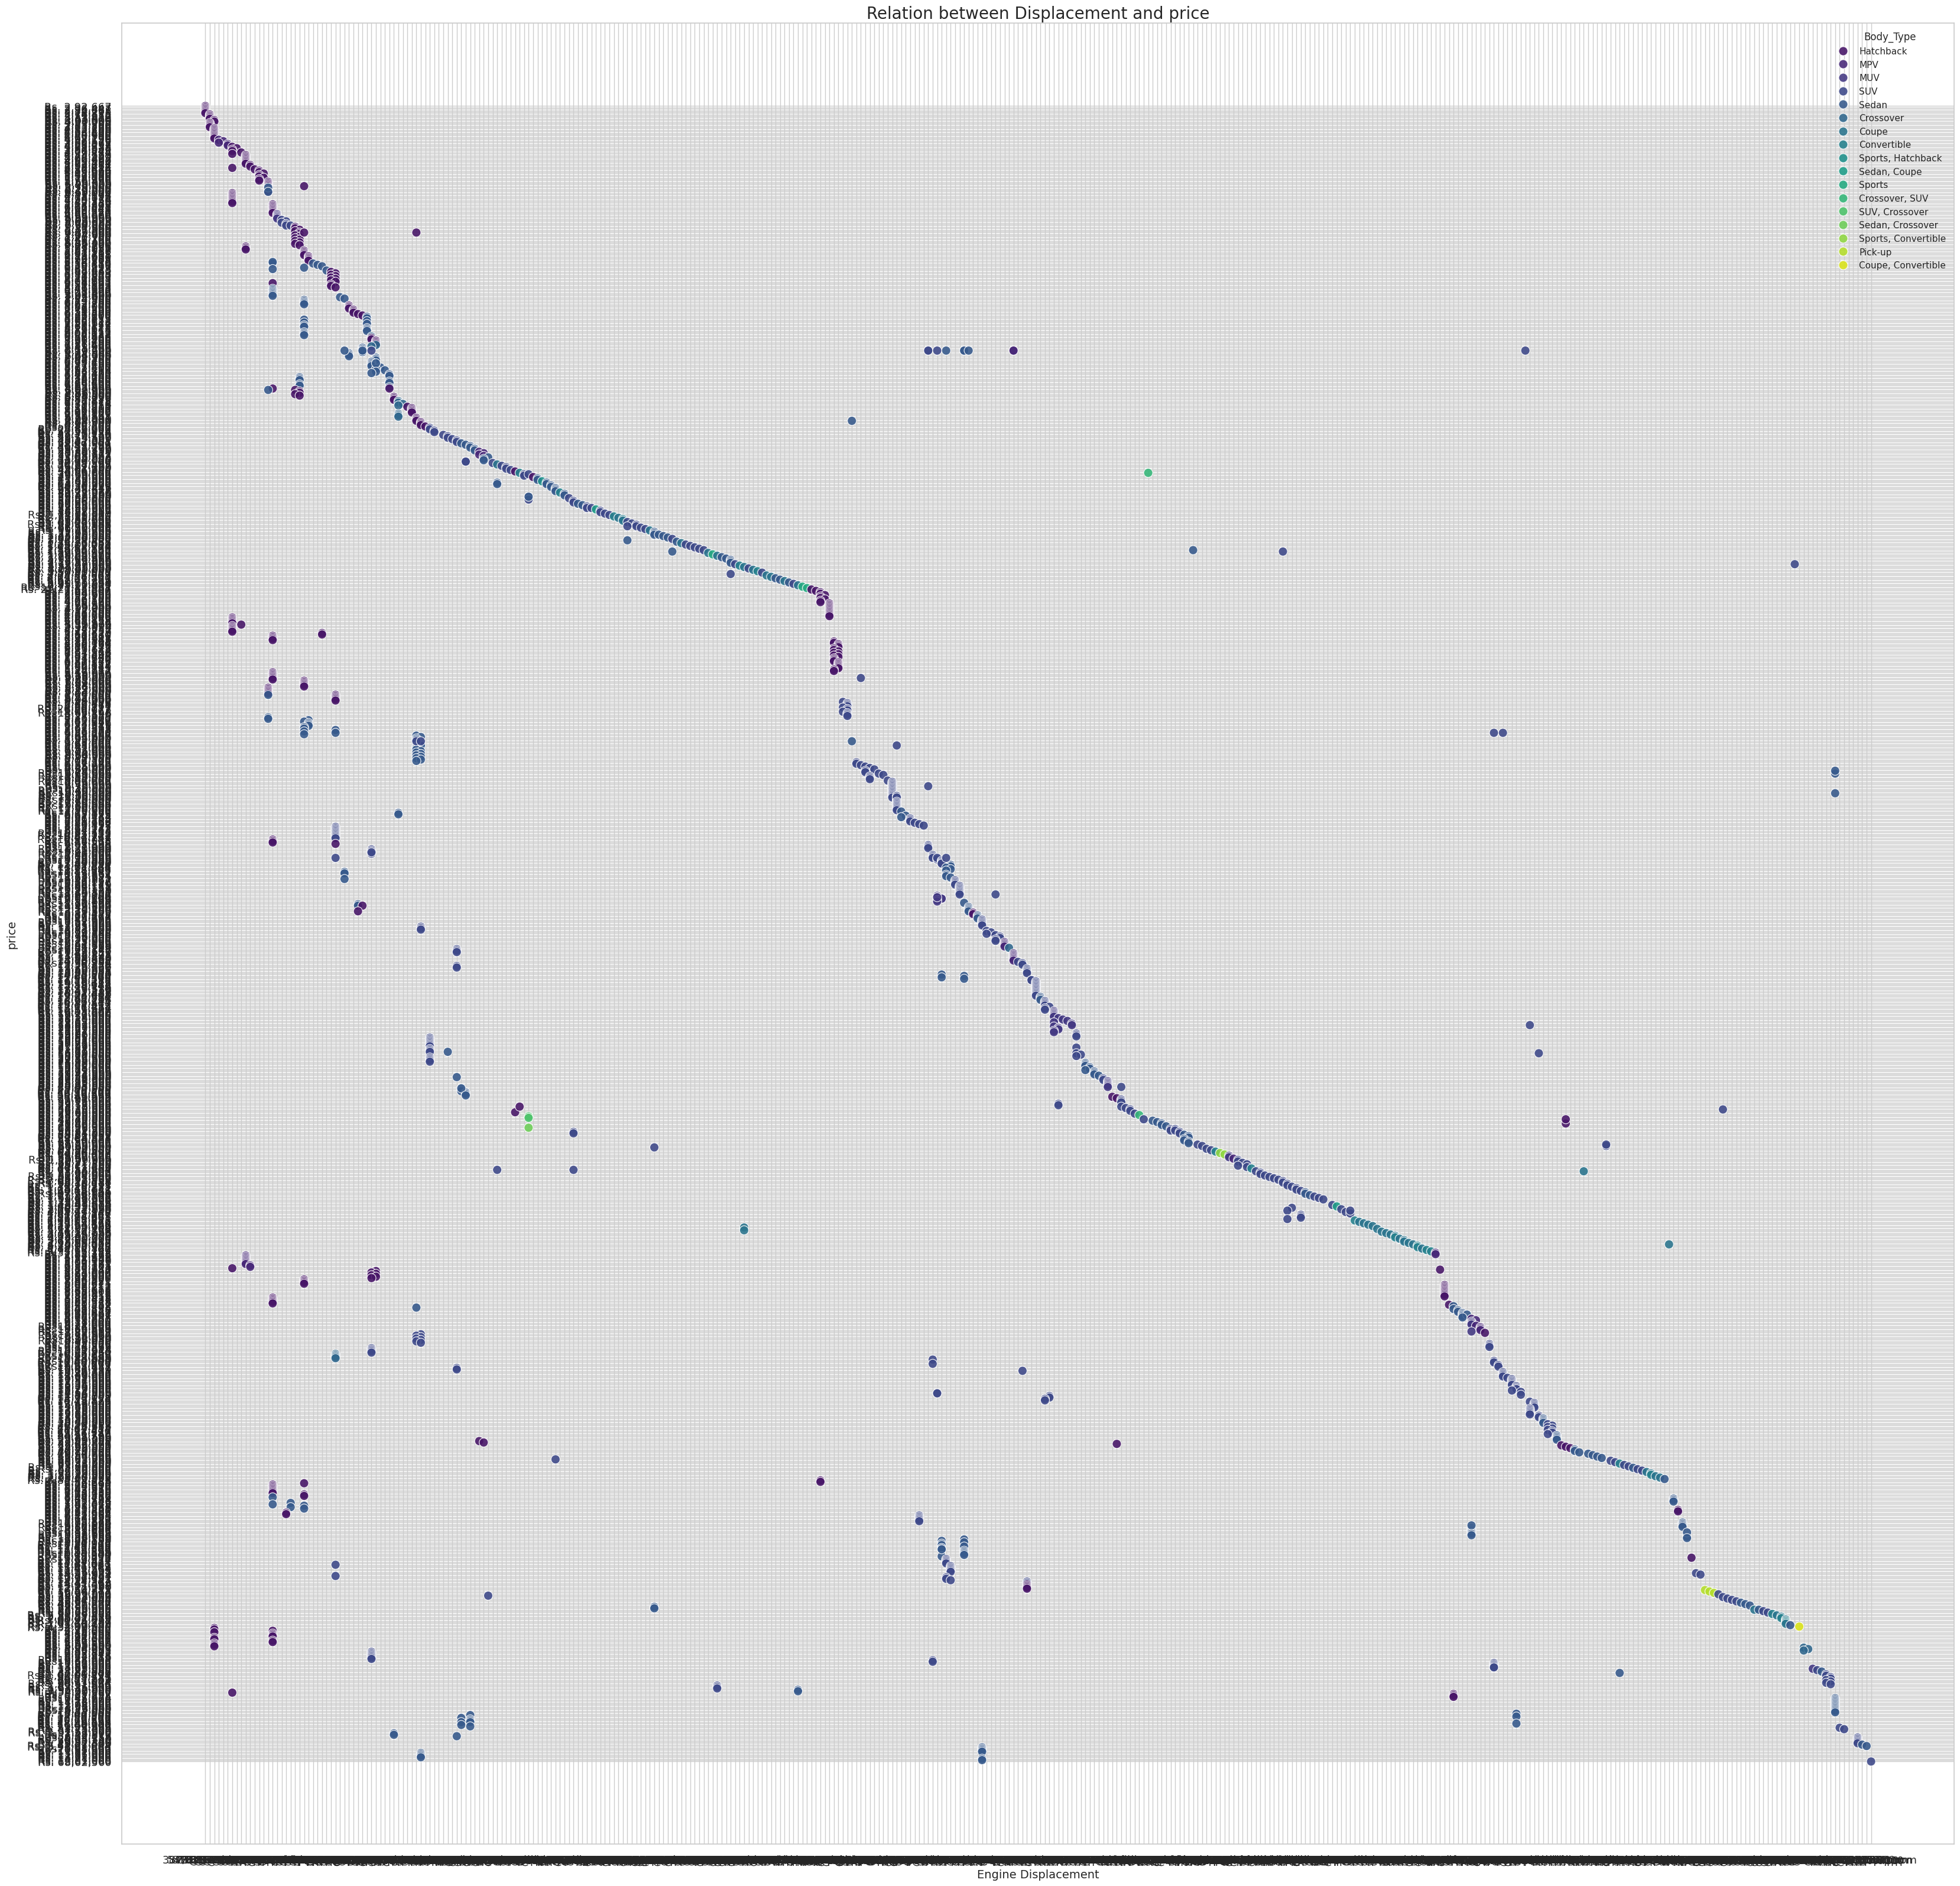

In [ ]:
plt.figure(figsize=(40,40))
sns.scatterplot(data=df, x='Power', y='Ex-Showroom_Price',hue='Body_Type', palette='viridis',alpha=.89, s=120 )
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('Engine Displacement',fontsize=14)
plt.ylabel('price',fontsize=14)
plt.title('Relation between Displacement and price',fontsize=20)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning:

SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning:

SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning:


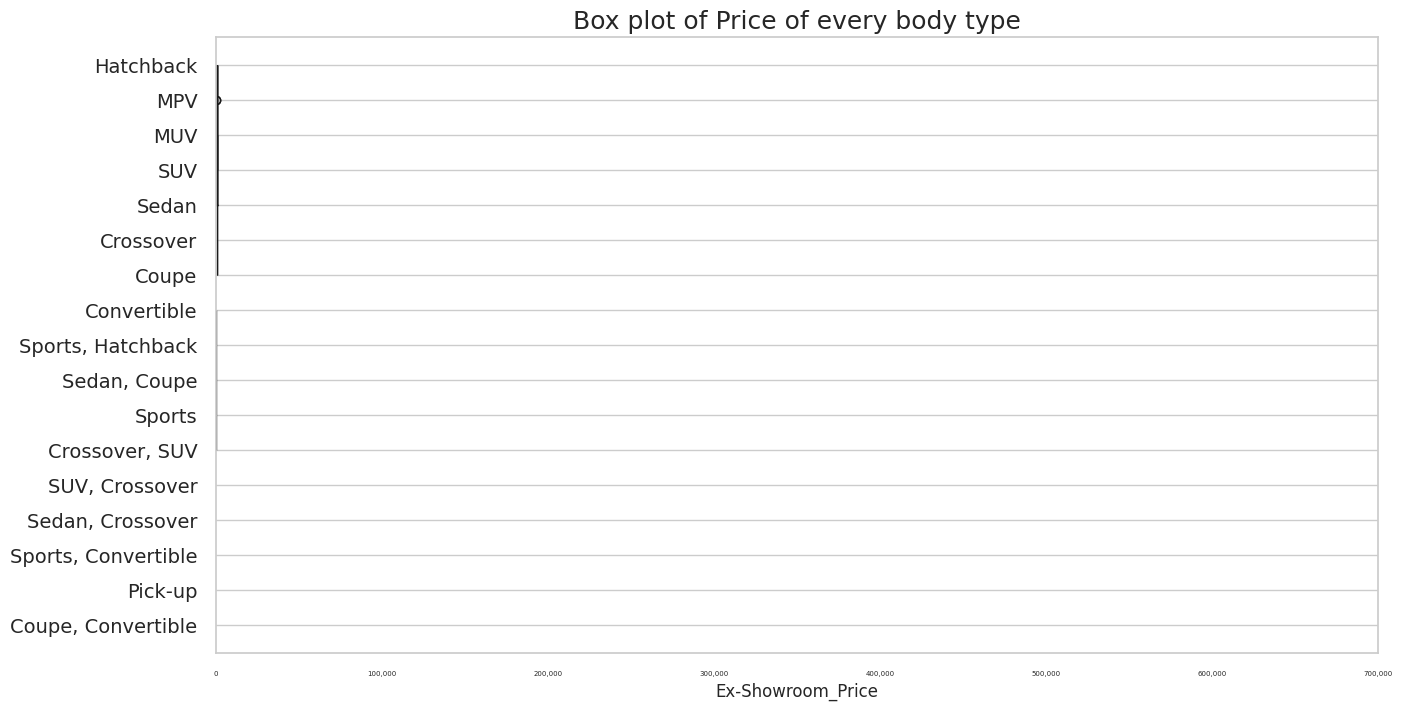

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df4, x='Ex-Showroom_Price', y='Body_Type', palette='viridis') # Changed 'price' to 'Ex-Showroom_Price'
plt.title('Box plot of Price of every body type',fontsize=18)
plt.ylabel('')
plt.yticks(fontsize=14)
plt.xticks([i for i in range(0,800000,100000)],[f'{i:,}' for i in range(0,800000,100000)],fontsize=5);

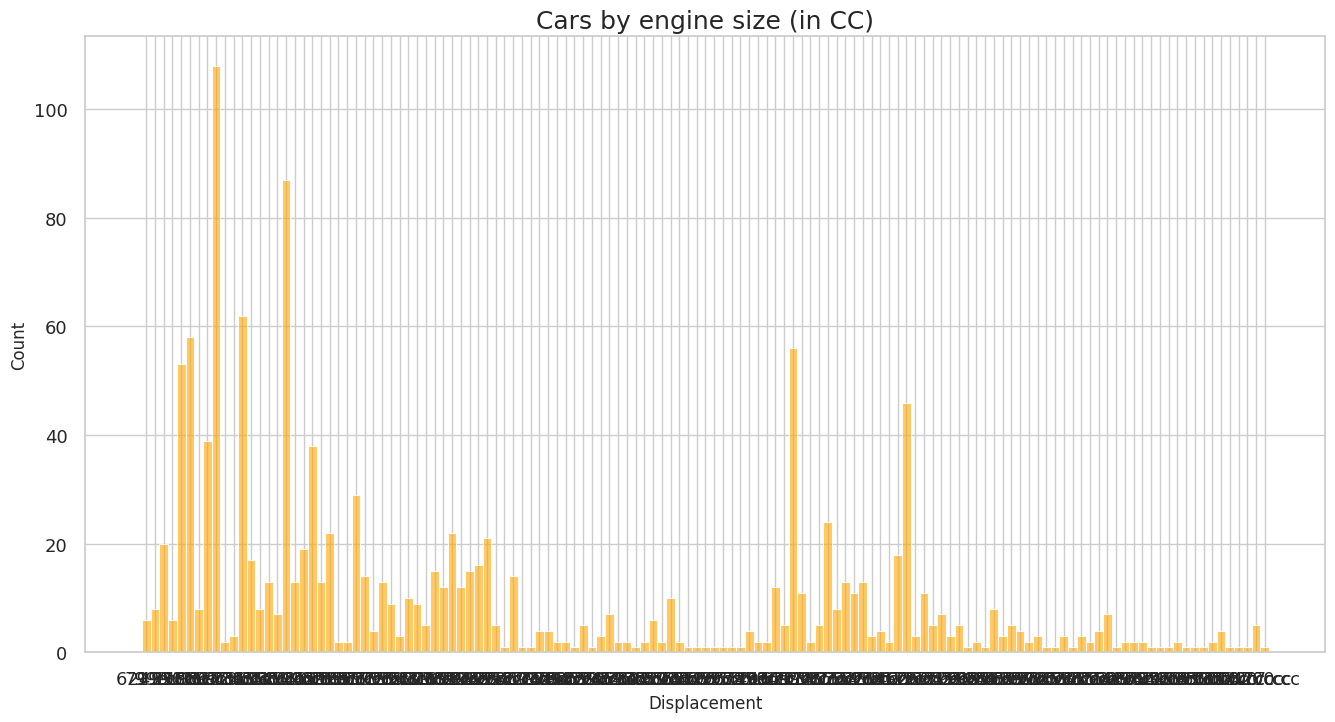

In [ ]:
plt.figure(figsize=(16,8))
sns.histplot(data=df4, x='Displacement',alpha=.6, color='orange',bins=10)
plt.title('Cars by engine size (in CC)',fontsize=18)
plt.xticks(fontsize=13);
plt.yticks(fontsize=13);

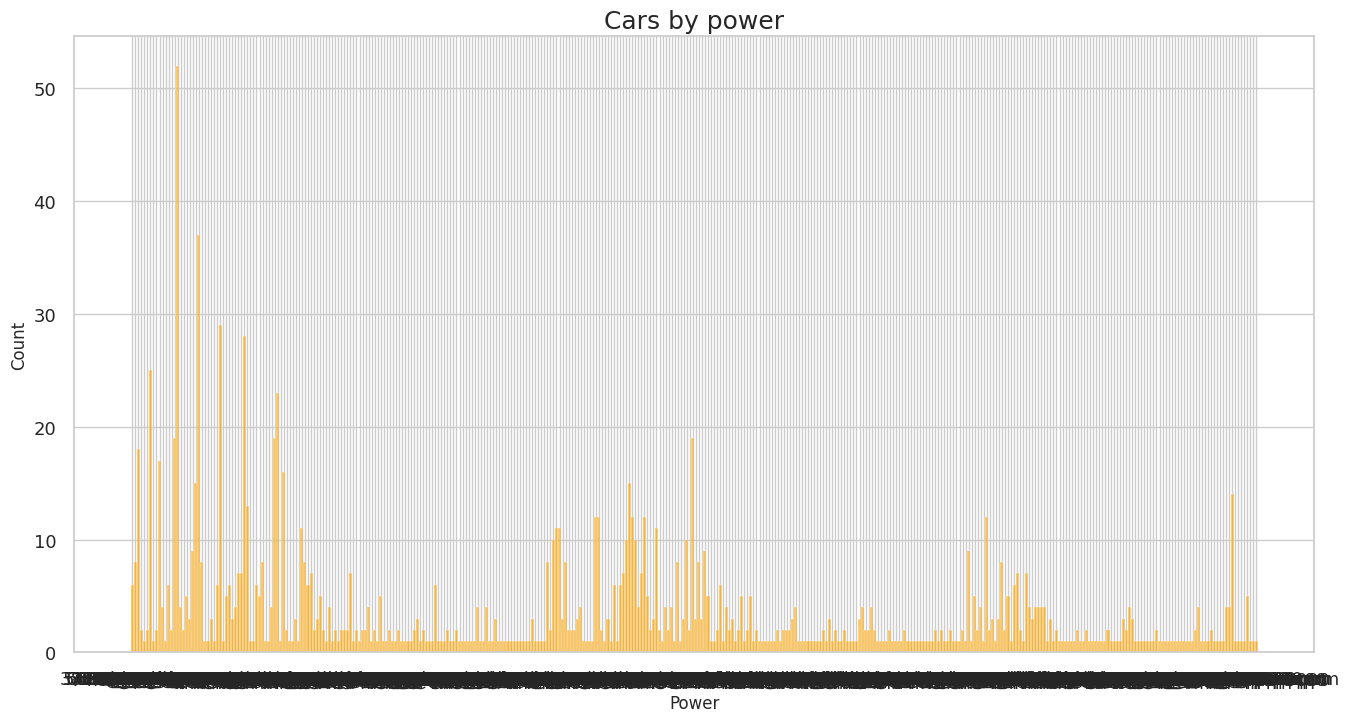

In [ ]:
plt.figure(figsize=(16,8))
sns.histplot(data=df4, x='Power',alpha=.6, color='orange')
plt.title('Cars by power',fontsize=18);
plt.xticks(fontsize=13);
plt.yticks(fontsize=13);

In [ ]:
cars_data = df4
# Convert "Ex-Showroom_Price" to numeric by removing non-numeric characters like 'Rs.' and ',' and converting to float
cars_data['Ex-Showroom_Price'] = cars_data['Ex-Showroom_Price'].str.replace('Rs. ', '').str.replace(',', '').astype(float)

# Select relevant numeric columns for clustering
cluster_data = cars_data[['Ex-Showroom_Price', 'Displacement', 'Cylinders', 'Valves_Per_Cylinder']].copy()

# Remove 'cc' from 'Displacement' and convert to numeric
cluster_data['Displacement'] = cluster_data['Displacement'].str.replace(' cc', '').astype(float)

# Drop rows with missing values in these selected columns
cluster_data.dropna(inplace=True)

# Display the cleaned data
cluster_data.head()


Ex-Showroom_Price  Displacement  Cylinders  Valves_Per_Cylinder
0           292667.0         624.0        2.0                  2.0
1           236447.0         624.0        2.0                  2.0
2           296661.0         624.0        2.0                  2.0
3           334768.0         624.0        2.0                  2.0
4           272223.0         624.0        2.0                  2.0

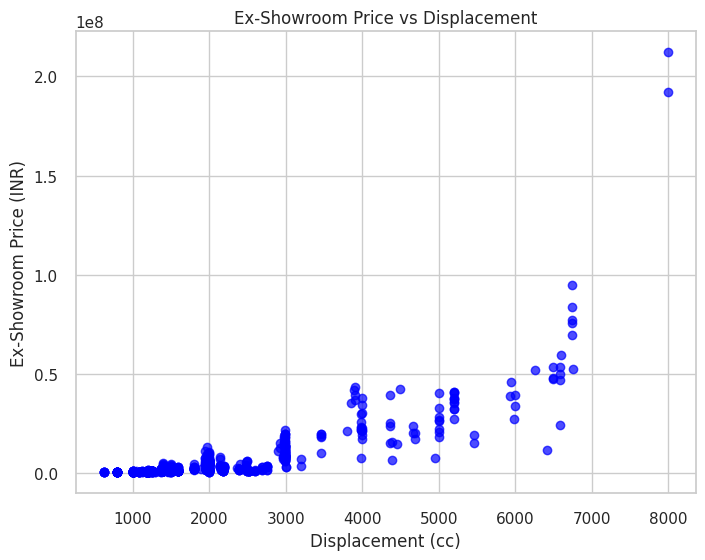

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style for better visuals
sns.set(style="whitegrid")

# 1. Scatter plot: Ex-Showroom_Price vs Displacement
plt.figure(figsize=(8, 6))
plt.scatter(cluster_data['Displacement'], cluster_data['Ex-Showroom_Price'], alpha=0.7, color='blue')
plt.title('Ex-Showroom Price vs Displacement')
plt.xlabel('Displacement (cc)')
plt.ylabel('Ex-Showroom Price (INR)')
plt.grid(True)
plt.show()



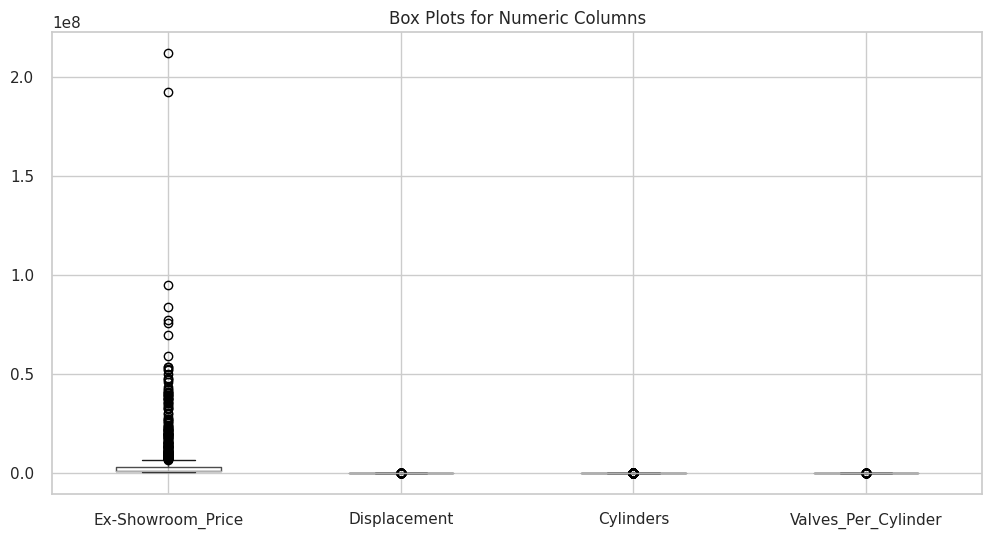

In [ ]:

# 2. Box plots for numeric columns
plt.figure(figsize=(12, 6))
cluster_data.boxplot(column=['Ex-Showroom_Price', 'Displacement', 'Cylinders', 'Valves_Per_Cylinder'])
plt.title('Box Plots for Numeric Columns')
plt.show()

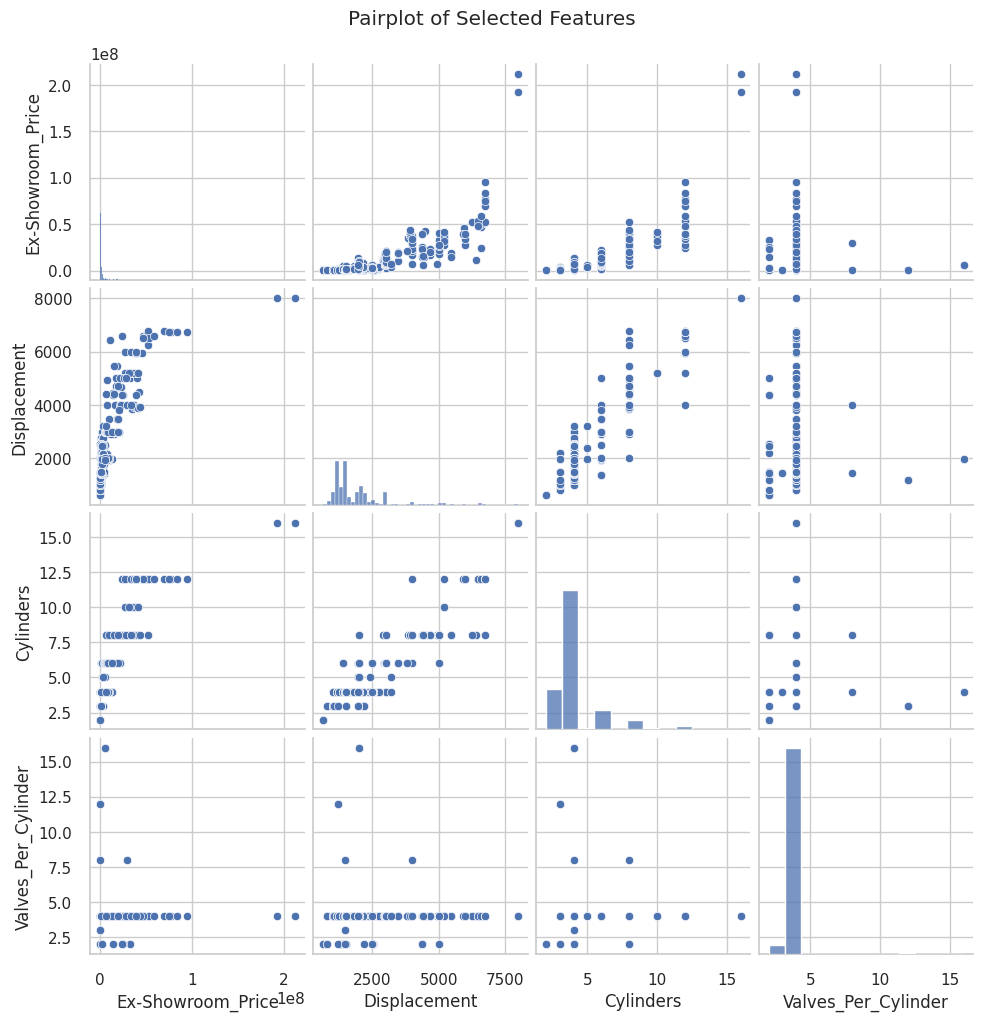

In [ ]:
# 3. Pairplot of all numeric columns
sns.pairplot(cluster_data)
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()

#conclusions drawn after conducting exploratory data analysis on the Indian car market:


1. Top Companies & Car Variants**: Maruti Suzuki, Hyundai, Mahindra, Tata, and Toyota dominate the market with the most car variants.
2. Popular Body Types**: Hatchbacks and SUVs are the most favored body types in India.
3. Fuel Type: Petrol and diesel are the primary fuel types in the market.
4. Power & Price Relationship**:
   - Power increases the price but decreases mileage.
   - Torque is directly proportional to power and thus price.
   - Cars in India generally have decent horsepower, balancing power and performance.
5. Engine & Price Correlation**:
   - Ex-showroom price is positively correlated with engine displacement and the number of cylinders. More cylinders often mean higher power and displacement, leading to a higher price.
6. Doors & Sports Cars: A lower number of doors is negatively correlated with displacement, reflecting the characteristics of sports cars.
7. Technological Adoption**:
   - Power steering, power windows, and keyless entry are common features.
   - Most cars have infotainment systems (audio, Bluetooth), and 4-10 seats, showing a preference for larger vehicles.
   - Leather seats and automatic transmissions are increasingly popular.
8. Safety & New Technologies:
   - Indian cars are gradually adopting advanced safety features, but there's room for improvement.
   - Most cars have features like Engine Immobilizer (anti-theft) and ISOFIX child seat mounts, showing a family-oriented preference.
   - However, advanced systems like ESP (Electronic Stability Program) and multiple airbags are less common, particularly in budget cars, where safety features are more basic.

